In [1]:
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
deliveries = pd.read_csv(r"D:\Data\Krayen\EDA ON IPL\deliveries.csv")
matches = pd.read_csv(r"D:\Data\Krayen\EDA ON IPL\matches.csv")

display(deliveries.head())
display(matches.head())

print(f"Deliveries: {deliveries.shape} and Matches: {matches.shape}")

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


Deliveries: (150460, 21) and Matches: (636, 18)


In [3]:
"""Can we combine using match_id and id?"""
print(deliveries.match_id.nunique())
print(matches.id.nunique())

636
636


In [4]:
df = deliveries.merge(matches, how = 'inner', left_on='match_id', right_on='id')
print(df.shape)
df.head()

(150460, 39)


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


## **Missing values frequency**

In [5]:
df.isnull().sum().to_frame().rename({0: 'missing_val_%'}, axis = 1).style.background_gradient('Blues')

,missing_val_%
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batsman,0
non_striker,0
bowler,0
is_super_over,0


## **Missing values Visualization**

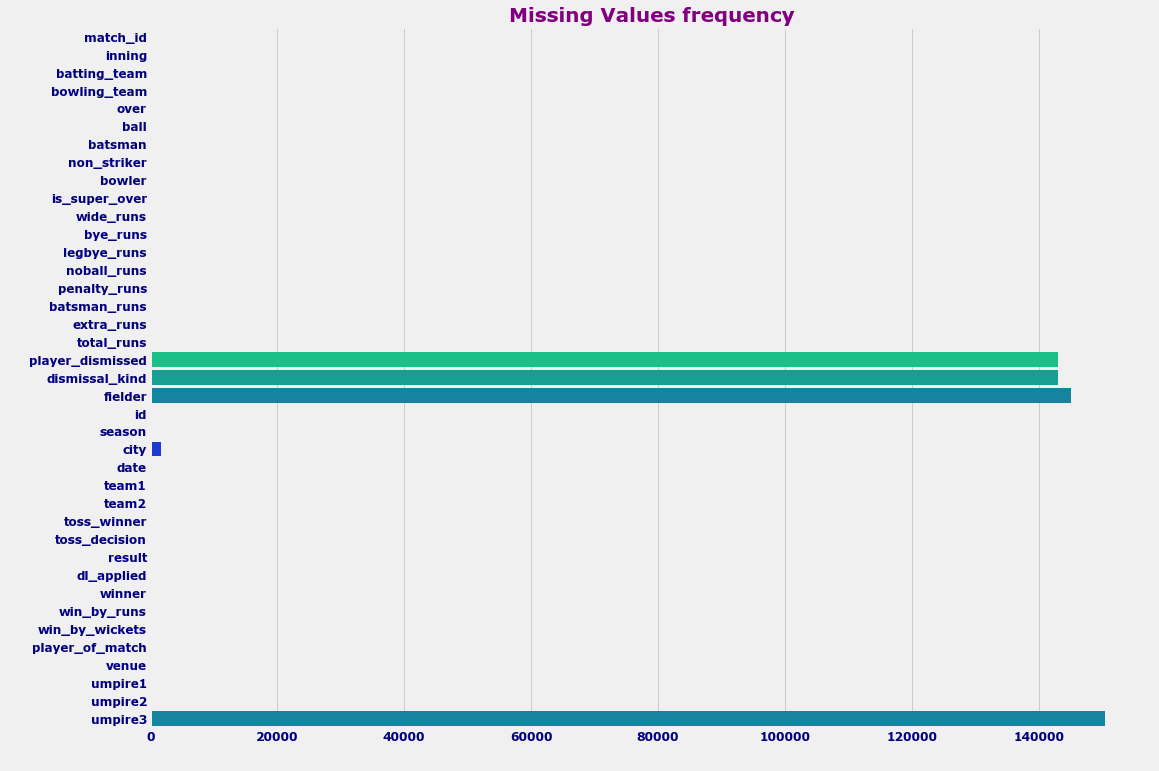

In [6]:
missing_df = df.isnull().sum().to_frame().reset_index().rename({0: 'missing_val_%'}, axis = 1)
plt.figure(figsize = (16,12))
sns.barplot(data = missing_df, x = 'missing_val_%', y = 'index',palette=sns.color_palette('winter_r'))
plt.title('Missing Values frequency', fontsize = 20, fontweight = 'bold', color = 'purple')
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks( fontsize = 12, fontweight = 'bold', color = 'navy')
plt.yticks(fontsize = 12, fontweight = 'bold', color = 'navy')
plt.show();

In [7]:
df.city.fillna('INFO_MISSING', inplace = True)
df.umpire1.fillna('INFO_MISSING', inplace = True)
df.umpire2.fillna('INFO_MISSING', inplace = True)
df.winner.fillna('INFO_MISSING', inplace = True)
df.player_of_match.fillna('INFO_MISSING', inplace = True)
df.drop('umpire3', axis = 1, inplace = True)


df.player_dismissed.fillna('Not Applicable', inplace = True)
df.dismissal_kind.fillna('Not Applicable', inplace = True)
df.fielder.fillna('Not Applicable', inplace = True)

df.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
id                  0
season              0
city                0
date                0
team1               0
team2               0
toss_winner         0
toss_decision       0
result              0
dl_applied          0
winner              0
win_by_runs         0
win_by_wickets      0
player_of_match     0
venue               0
umpire1             0
umpire2             0
dtype: int64

## Total Matches played, Venues and Teams

In [8]:
print(f"Total Matches Played: {df.match_id.nunique()}\n\nVenues Played At: Total: {df['city'].nunique()}\
{df['city'].unique()} \
\n\nTeams : Total: {df['team1'].nunique()} {df['team1'].unique()}")

Total Matches Played: 636

Venues Played At: Total: 31['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah'
 'INFO_MISSING'] 

Teams : Total: 14 ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants']


In [9]:
print(f"Player with Most Man of the Match awards: {df['player_of_match'].value_counts().idxmax()}")
print(f"Team that won highest number of matches: {df['winner'].value_counts().idxmax()}")

Player with Most Man of the Match awards: CH Gayle
Team that won highest number of matches: Mumbai Indians


## **Number of matches played in various cities**

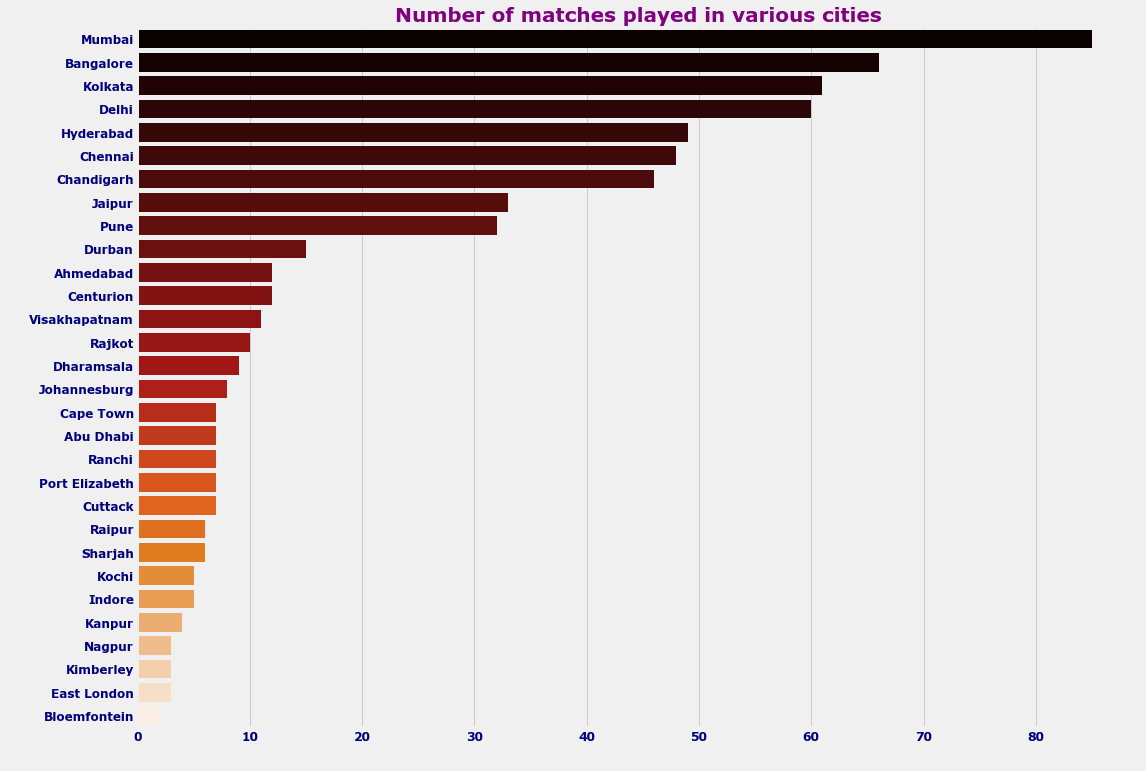

In [10]:
plt.figure(figsize = (16,12))
order_list = matches.city.value_counts().index.tolist()
sns.countplot(y=matches.city, palette='gist_heat', order = order_list)
plt.title('Number of matches played in various cities', fontsize = 20, fontweight = 'bold', color = 'purple')
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks(fontsize = 12, fontweight = 'bold', color = 'navy')
plt.yticks(fontsize = 12, fontweight = 'bold', color = 'navy')
plt.show();

## **How many matches played in each stadium?**

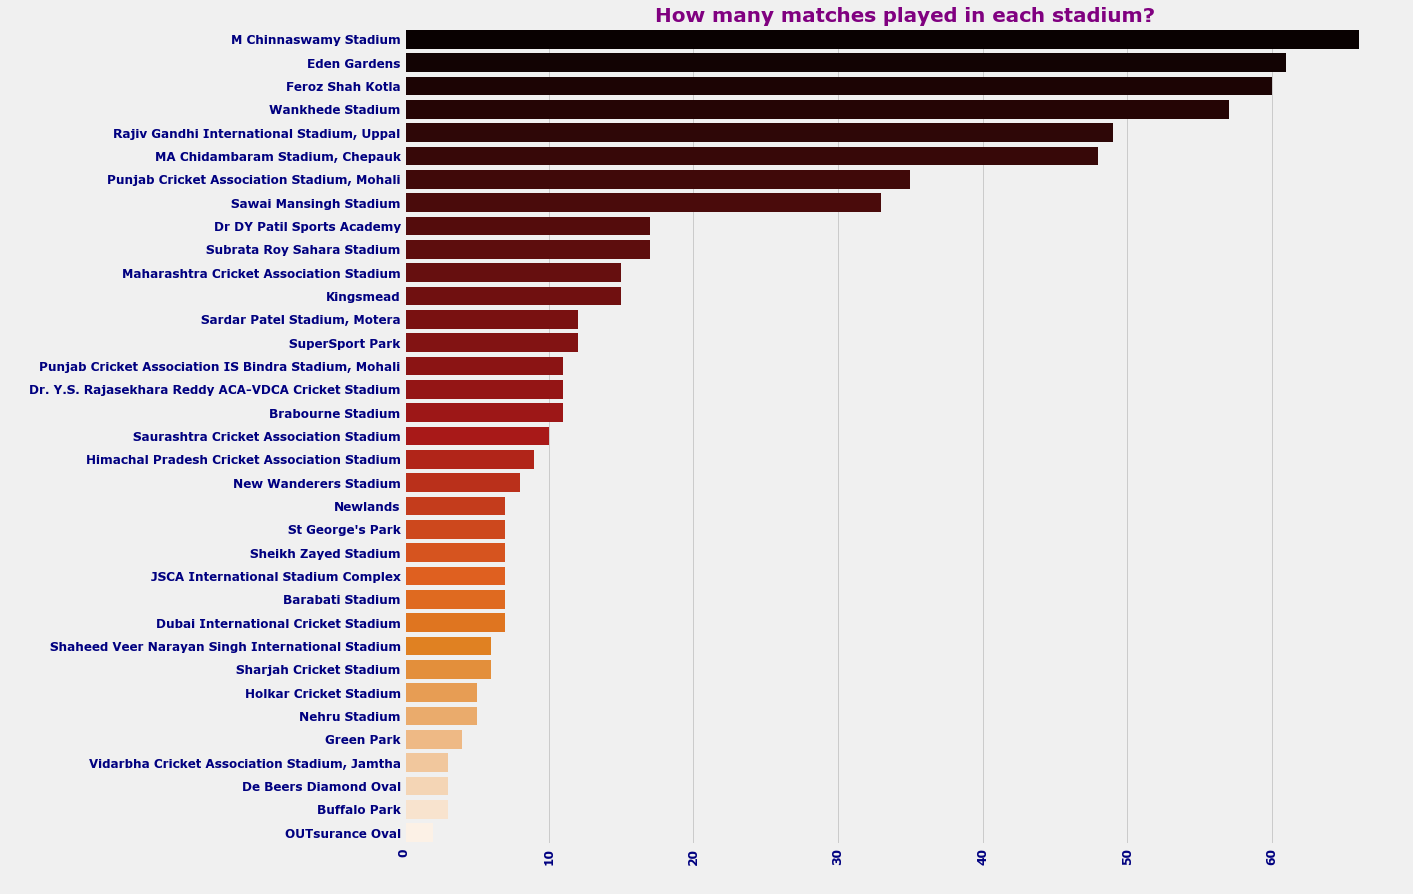

In [11]:
plt.figure(figsize = (16,14))
order_list = matches.venue.value_counts().index.tolist()
sns.countplot(y=matches.venue, palette='gist_heat', order = order_list)
plt.title('How many matches played in each stadium?', fontsize = 20, fontweight = 'bold', color = 'purple')
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks(fontsize = 12, fontweight = 'bold', color = 'navy', rotation = 90)
plt.yticks(fontsize = 12, fontweight = 'bold', color = 'navy')
plt.show();

## **Toss Decision across different season**

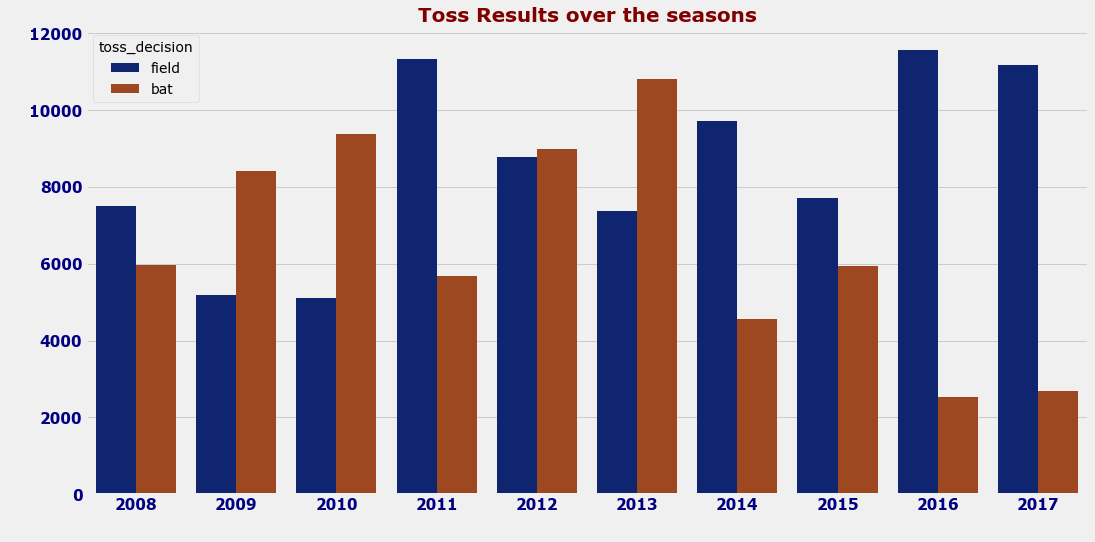

In [12]:
plt.figure(figsize=(16,8))
sns.countplot(x=df['season'],hue=df['toss_decision'],palette = 'dark')
plt.title('Toss Results over the seasons', fontsize = 20, fontweight = 'bold', color = 'maroon')
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks(fontsize = 15, fontweight = 'bold', color = 'navy')
plt.yticks(fontsize = 15, fontweight = 'bold', color = 'navy')
plt.show();

## **Toss winning impactful?**

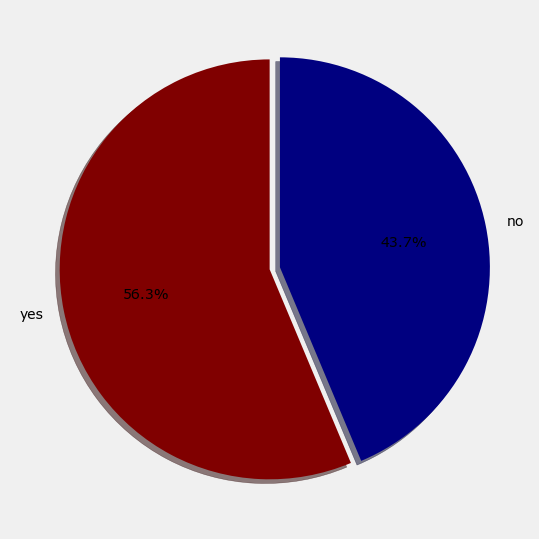

In [13]:
plt.figure(figsize = (16,8))
df_n=matches[matches['toss_winner']==matches['winner']]
slices=[len(df_n),(577-len(df_n))]
labels=['yes','no']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%' ,colors=['maroon','navy'])
fig = plt.gcf()
fig.set_size_inches(9,9)
plt.show()

## **Number of Matches played by each team**

,NumOfMatches
Mumbai Indians,82
Kings XI Punjab,77
Chennai Super Kings,77
Royal Challengers Bangalore,70
Kolkata Knight Riders,68
Delhi Daredevils,63
Rajasthan Royals,54
Sunrisers Hyderabad,46
Deccan Chargers,43
Pune Warriors,20


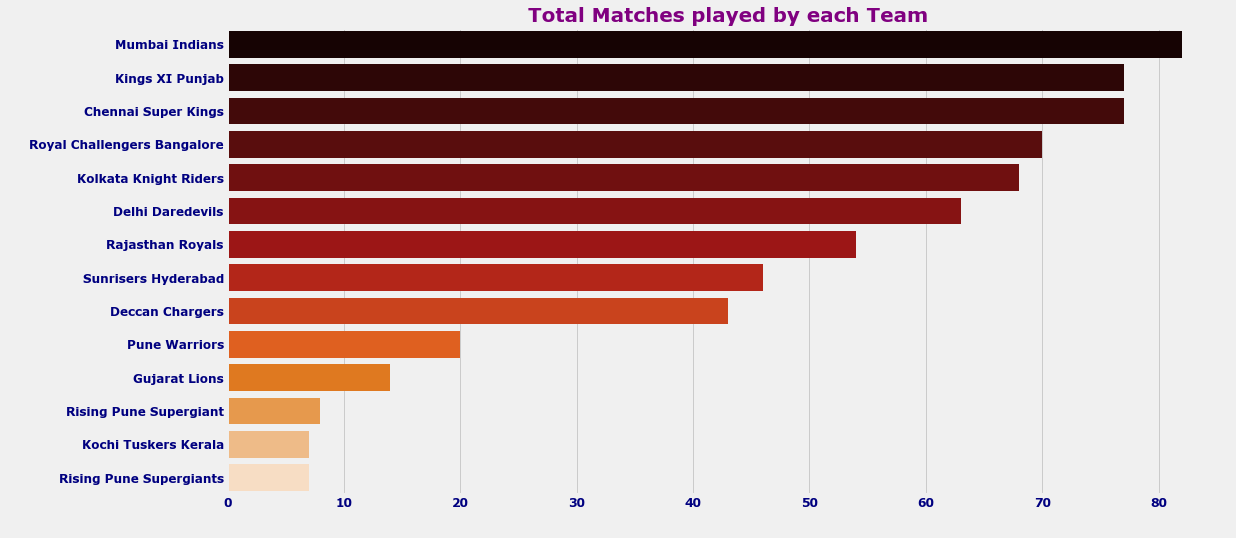

In [14]:
display(matches.team1.value_counts().to_frame().rename({'team1': 'NumOfMatches'}, axis =1).style.background_gradient('RdBu'))

num_matches = matches.team1.value_counts().to_frame().reset_index().rename({'team1': 'NumOfMatches'}, axis =1)
plt.figure(figsize = (16,8))
sns.barplot(y=num_matches['index'],x=num_matches['NumOfMatches'], palette='gist_heat')
plt.title('Total Matches played by each Team', fontsize = 20, fontweight = 'bold', color = 'purple')
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks(fontsize = 12, fontweight = 'bold', color = 'navy')
plt.yticks(fontsize = 12, fontweight = 'bold', color = 'navy')
plt.show();

## **Number of Matches won by each team** 

,TotalWins
Mumbai Indians,92
Chennai Super Kings,79
Kolkata Knight Riders,77
Royal Challengers Bangalore,73
Kings XI Punjab,70
Rajasthan Royals,63
Delhi Daredevils,62
Sunrisers Hyderabad,42
Deccan Chargers,29
Gujarat Lions,13


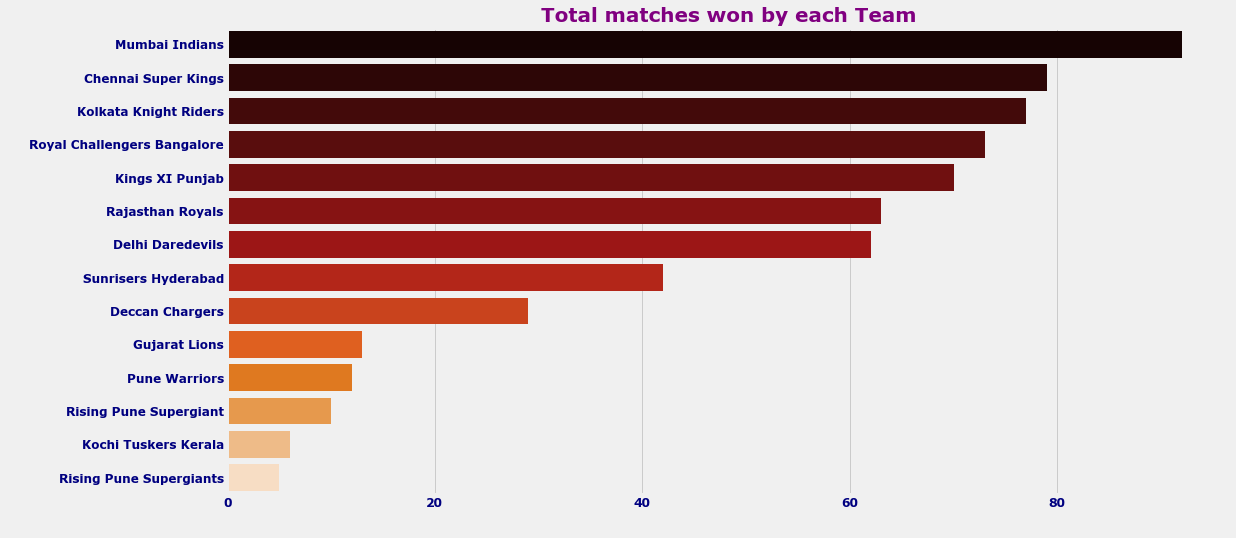

In [15]:
display(matches.winner.value_counts().to_frame().rename({'winner': 'TotalWins'}, axis =1).style.background_gradient('RdBu'))

matches_won = matches.winner.value_counts().to_frame().reset_index().rename({'winner': 'TotalWins'}, axis =1)
plt.figure(figsize = (16,8))
sns.barplot(y=matches_won['index'],x=matches_won['TotalWins'], palette='gist_heat')
plt.title('Total matches won by each Team', fontsize = 20, fontweight = 'bold', color = 'purple')
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks(fontsize = 12, fontweight = 'bold', color = 'navy')
plt.yticks(fontsize = 12, fontweight = 'bold', color = 'navy')
plt.show();

## **Top 10 Batsmen each season**

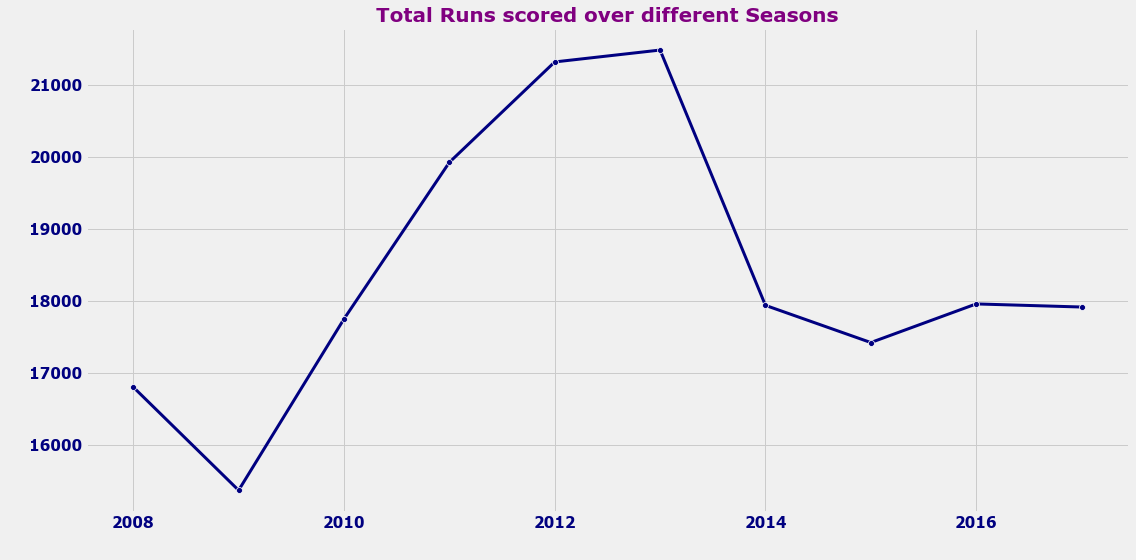

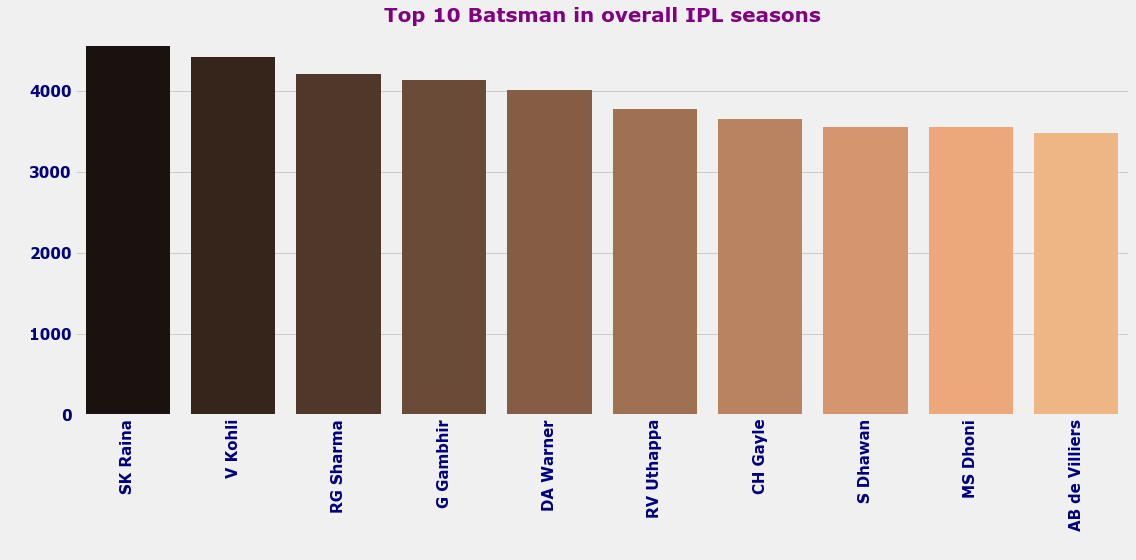

,batsman_runs_2017
batsman,
DA Warner,641
G Gambhir,498
S Dhawan,479
SPD Smith,472
SK Raina,442
HM Amla,420
MK Pandey,396
PA Patel,395
KA Pollard,395


,batsman_runs_2008
batsman,
SE Marsh,616
G Gambhir,534
ST Jayasuriya,514
SR Watson,472
GC Smith,441
AC Gilchrist,436
YK Pathan,435
SK Raina,421
MS Dhoni,414


,batsman_runs_2009
batsman,
ML Hayden,572
AC Gilchrist,495
AB de Villiers,465
SK Raina,434
TM Dilshan,418
JP Duminy,372
HH Gibbs,371
BJ Hodge,365
SR Tendulkar,364


,batsman_runs_2010
batsman,
SR Tendulkar,618
JH Kallis,572
SK Raina,528
SC Ganguly,493
M Vijay,458
DPMD Jayawardene,445
A Symonds,429
SS Tiwary,419
RG Sharma,404


,batsman_runs_2011
batsman,
CH Gayle,608
V Kohli,557
SR Tendulkar,553
SE Marsh,504
MEK Hussey,492
PC Valthaty,463
SK Raina,438
M Vijay,434
V Sehwag,424


,batsman_runs_2012
batsman,
CH Gayle,733
G Gambhir,590
S Dhawan,569
AM Rahane,560
V Sehwag,495
CL White,479
R Dravid,462
SK Raina,441
RG Sharma,433


,batsman_runs_2013
batsman,
MEK Hussey,733
CH Gayle,720
V Kohli,639
SK Raina,548
SR Watson,543
RG Sharma,538
KD Karthik,510
AM Rahane,488
R Dravid,471


,batsman_runs_2014
batsman,
RV Uthappa,660
DR Smith,566
GJ Maxwell,552
DA Warner,528
SK Raina,523
V Sehwag,455
DA Miller,446
JP Duminy,410
MK Pandey,409


,batsman_runs_2015
batsman,
DA Warner,562
AM Rahane,540
LMP Simmons,540
AB de Villiers,513
V Kohli,505
CH Gayle,491
RG Sharma,482
SS Iyer,439
BB McCullum,436


,batsman_runs_2016
batsman,
V Kohli,973
DA Warner,848
AB de Villiers,687
S Dhawan,501
G Gambhir,501
RG Sharma,489
AM Rahane,480
M Vijay,453
Q de Kock,445


In [16]:
years_list = df.season.unique().tolist()

runs_over_seasons = df.groupby(['season']).sum()[['batsman_runs']].reset_index()

plt.figure(figsize = (16,8))
sns.lineplot(x=runs_over_seasons['season'],y=runs_over_seasons['batsman_runs'], color = 'navy', marker='o', lw = 3)
plt.title('Total Runs scored over different Seasons', fontsize = 20, fontweight = 'bold', color = 'purple')
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks(fontsize = 15, fontweight = 'bold', color = 'navy')
plt.yticks(fontsize = 15, fontweight = 'bold', color = 'navy')
plt.tight_layout()
plt.show();


best_batsman_over_seasons = df.groupby(['batsman']).sum()[['batsman_runs']].reset_index()\
.sort_values(by = 'batsman_runs', ascending = False).head(10)

plt.figure(figsize = (16,8))
sns.barplot(x=best_batsman_over_seasons['batsman'],y=best_batsman_over_seasons['batsman_runs'], palette = 'copper', alpha =1)
plt.title('Top 10 Batsman in overall IPL seasons', fontsize = 20, fontweight = 'bold', color = 'purple')
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks(fontsize = 15, fontweight = 'bold', color = 'navy', rotation = 90)
plt.yticks(fontsize = 15, fontweight = 'bold', color = 'navy')
plt.tight_layout()
plt.show();

for i in years_list:
    display(df[df.season == i].groupby(['batsman']).sum()[['batsman_runs']]\
            .rename({'batsman_runs': f'batsman_runs_{i}'}, axis = 1)\
            .sort_values(f'batsman_runs_{i}', ascending = False).head(10)\
            .style.background_gradient('copper_r'))

## **Top 10 Bowler each season**

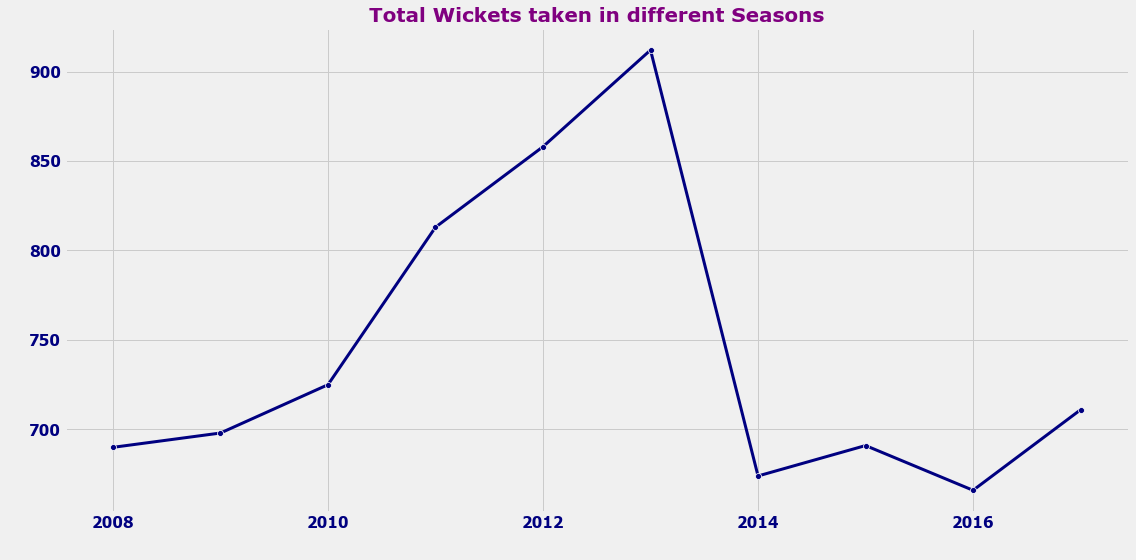

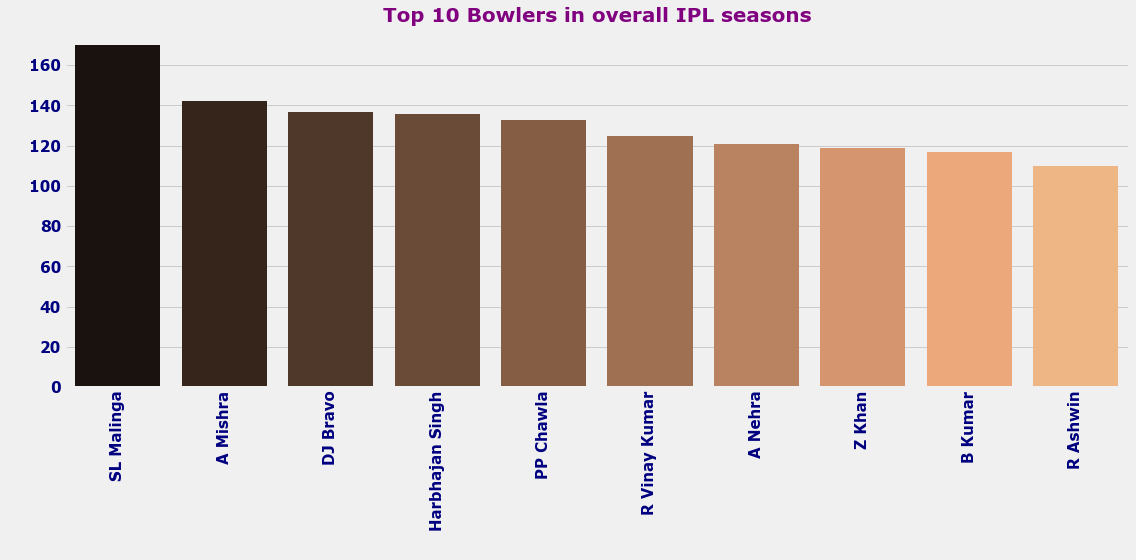

,player_dismissed_2017
bowler,
B Kumar,28
JD Unadkat,27
JJ Bumrah,23
MJ McClenaghan,20
Imran Tahir,19
Rashid Khan,18
CR Woakes,18
UT Yadav,18
Sandeep Sharma,17


,player_dismissed_2008
bowler,
Sohail Tanvir,24
IK Pathan,20
SR Watson,20
SK Warne,20
JA Morkel,20
S Sreesanth,19
PP Chawla,19
MF Maharoof,19
MS Gony,18


,player_dismissed_2009
bowler,
RP Singh,26
A Kumble,22
A Nehra,22
PP Ojha,21
SL Malinga,21
IK Pathan,20
DP Nannes,20
MM Patel,18
PJ Sangwan,18


,player_dismissed_2010
bowler,
PP Ojha,22
Harbhajan Singh,20
A Mishra,20
A Kumble,19
R Vinay Kumar,19
Z Khan,18
KA Pollard,17
SL Malinga,17
DW Steyn,17


,player_dismissed_2011
bowler,
SL Malinga,30
S Aravind,22
MM Patel,22
R Ashwin,21
DE Bollinger,20
A Mishra,19
Iqbal Abdulla,18
RJ Harris,17
R Vinay Kumar,17


,player_dismissed_2012
bowler,
M Morkel,30
SP Narine,29
SL Malinga,25
UT Yadav,22
Z Khan,21
R Vinay Kumar,21
DJ Bravo,20
R Ashwin,19
KA Pollard,18


,player_dismissed_2013
bowler,
DJ Bravo,34
JP Faulkner,33
R Vinay Kumar,27
SP Narine,26
Harbhajan Singh,25
MG Johnson,24
A Mishra,24
SL Malinga,23
KK Cooper,22


,player_dismissed_2014
bowler,
MM Sharma,26
SP Narine,22
B Kumar,21
RA Jadeja,20
AR Patel,19
Sandeep Sharma,19
SL Malinga,17
MG Johnson,17
R Ashwin,17


,player_dismissed_2015
bowler,
DJ Bravo,28
SL Malinga,26
A Nehra,25
YS Chahal,24
MA Starc,22
Harbhajan Singh,19
HV Patel,19
B Kumar,19
MJ McClenaghan,18


,player_dismissed_2016
bowler,
B Kumar,24
SR Watson,23
YS Chahal,22
DS Kulkarni,20
DJ Bravo,19
Mustafizur Rahman,19
Sandeep Sharma,19
AD Russell,19
JJ Bumrah,18


In [17]:
years_list = df.season.unique().tolist()

wickets_over_seasons = df[df.player_dismissed != 'Not Applicable'].groupby(['season']).count()[['player_dismissed']].reset_index()

plt.figure(figsize = (16,8))
sns.lineplot(x=wickets_over_seasons['season'],y=wickets_over_seasons['player_dismissed'], color = 'navy', marker='o', lw = 3)
plt.title('Total Wickets taken in different Seasons', fontsize = 20, fontweight = 'bold', color = 'purple')
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks(fontsize = 15, fontweight = 'bold', color = 'navy')
plt.yticks(fontsize = 15, fontweight = 'bold', color = 'navy')
plt.tight_layout()
plt.show();

best_bowlers_over_seasons = df[df.player_dismissed != 'Not Applicable'].groupby(['bowler'])\
.count()[['player_dismissed']].reset_index().sort_values(by = 'player_dismissed', ascending = False).head(10)

plt.figure(figsize = (16,8))
sns.barplot(x=best_bowlers_over_seasons['bowler'],y=best_bowlers_over_seasons['player_dismissed'], palette = 'copper', alpha =1)
plt.title('Top 10 Bowlers in overall IPL seasons', fontsize = 20, fontweight = 'bold', color = 'purple')
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks(fontsize = 15, fontweight = 'bold', color = 'navy', rotation = 90)
plt.yticks(fontsize = 15, fontweight = 'bold', color = 'navy')
plt.tight_layout()
plt.show();

for i in years_list:
    display(df[(df.season == i) & (df.player_dismissed != 'Not Applicable')]\
            .groupby(['bowler']).count()[['player_dismissed']]\
            .rename({'player_dismissed': f'player_dismissed_{i}'}, axis = 1)\
            .sort_values(f'player_dismissed_{i}', ascending = False).head(10)\
            .style.background_gradient('copper_r'))


## **Total Runs scored each Ball for each Season**

,total_runs_2017
ball,
1,2938
2,3084
3,2961
4,3071
5,3076
6,3028


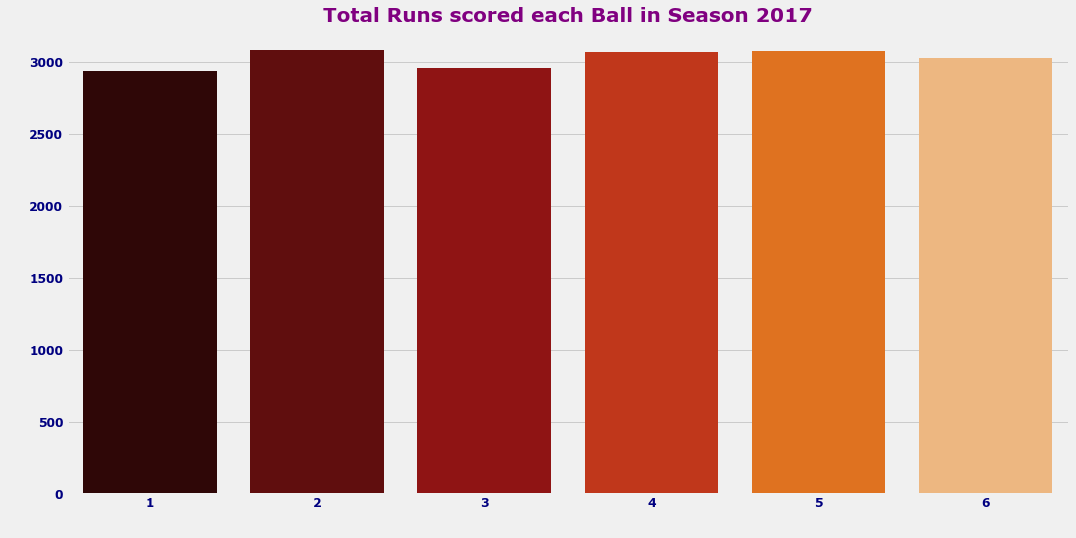

,total_runs_2008
ball,
1,2672
2,2855
3,2938
4,3055
5,2992
6,2807


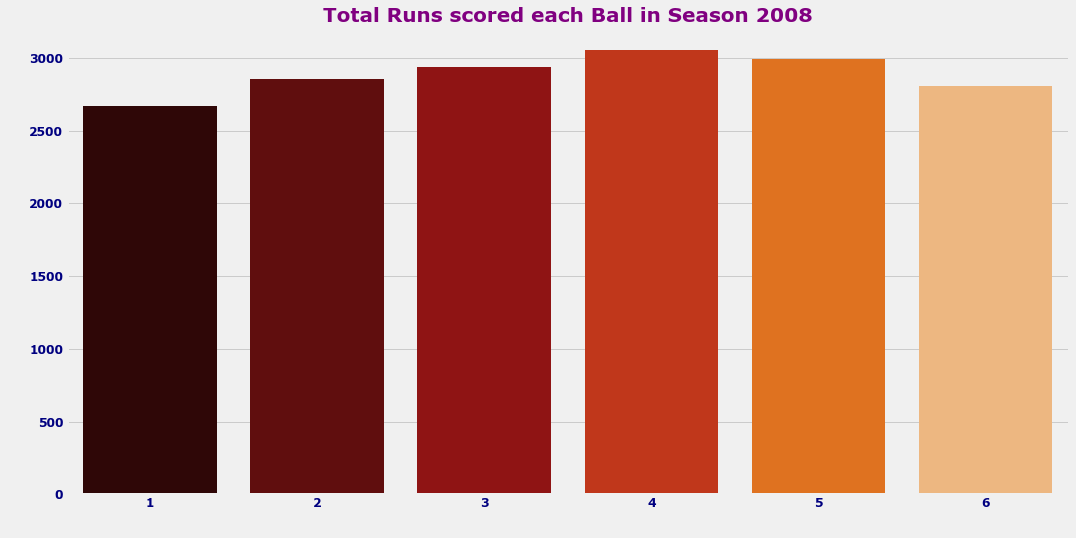

,total_runs_2009
ball,
1,2637
2,2568
3,2738
4,2677
5,2545
6,2584


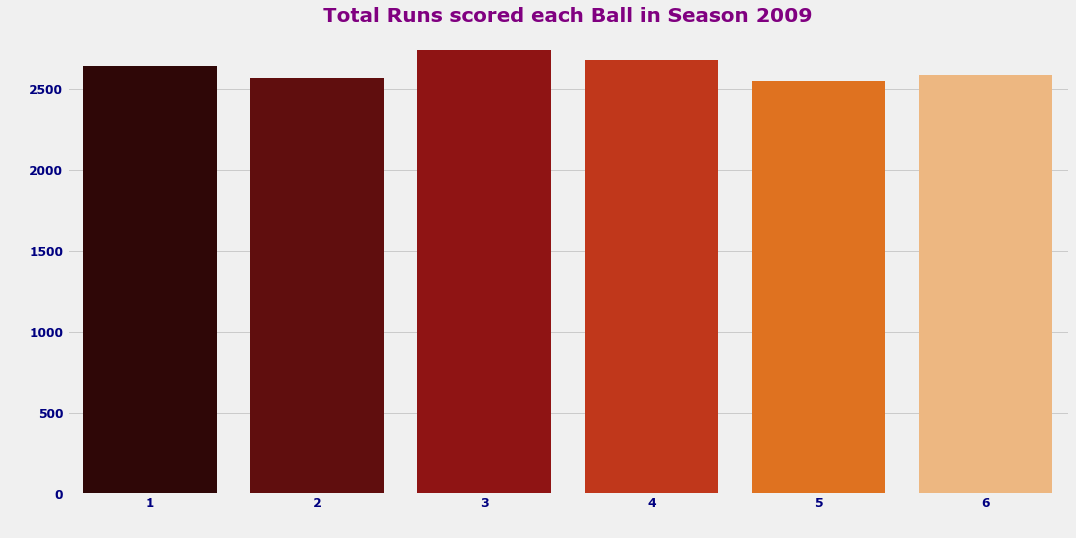

,total_runs_2010
ball,
1,3022
2,2903
3,3141
4,3005
5,3162
6,2991


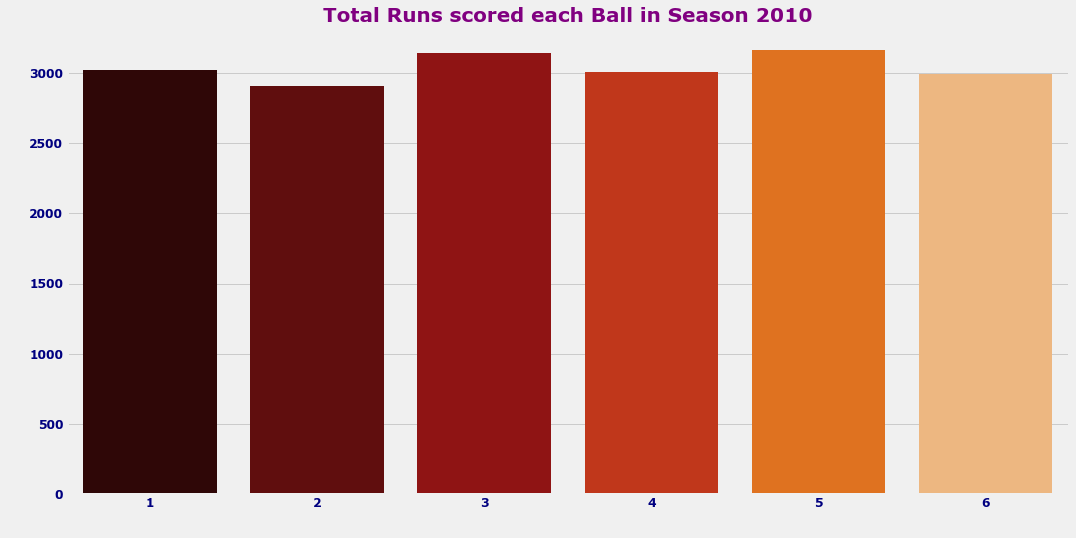

,total_runs_2011
ball,
1,3330
2,3480
3,3551
4,3405
5,3354
6,3298


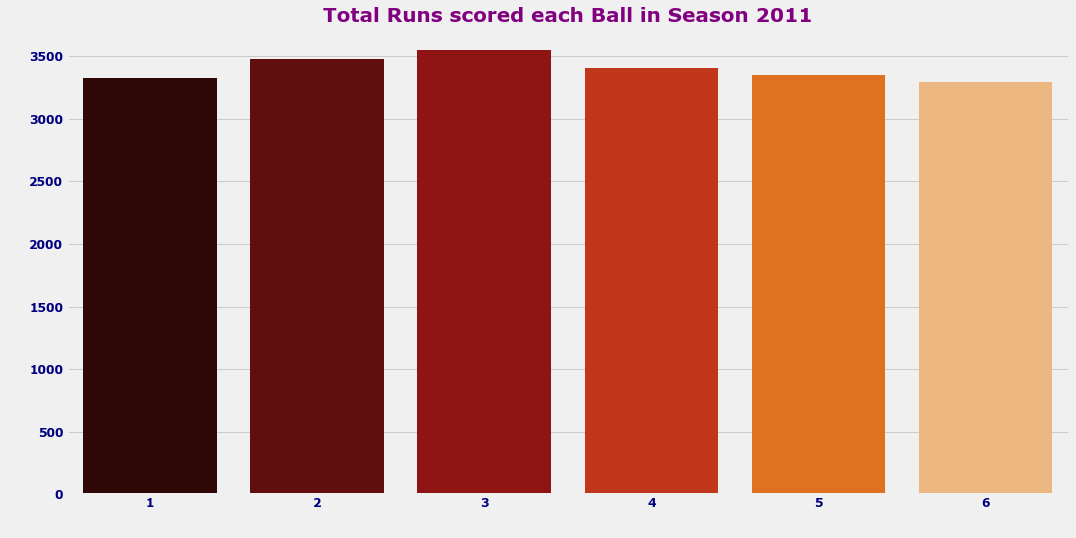

,total_runs_2012
ball,
1,3442
2,3683
3,3544
4,3773
5,3614
6,3660


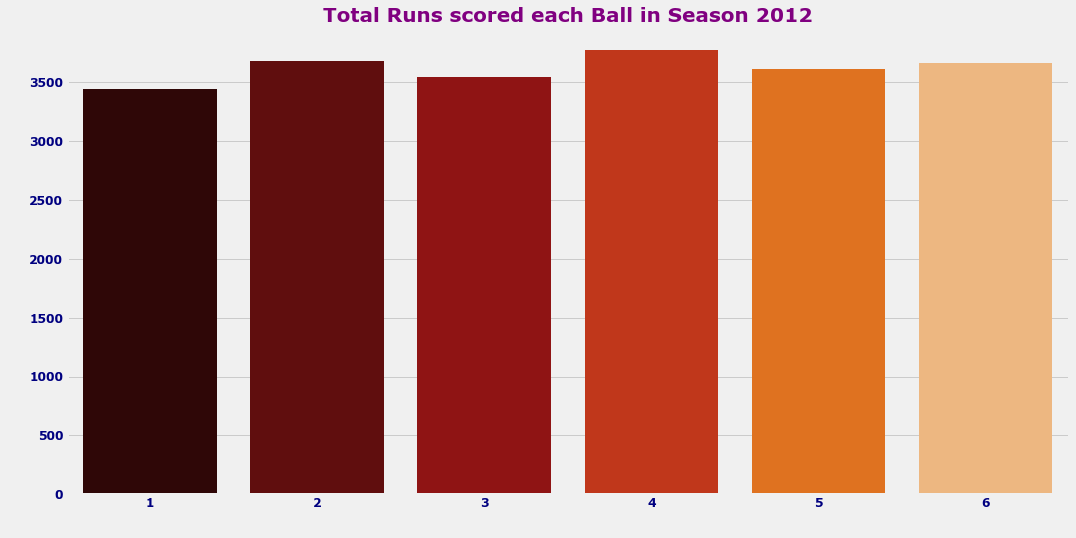

,total_runs_2013
ball,
1,3716
2,3482
3,3637
4,3704
5,3662
6,3686


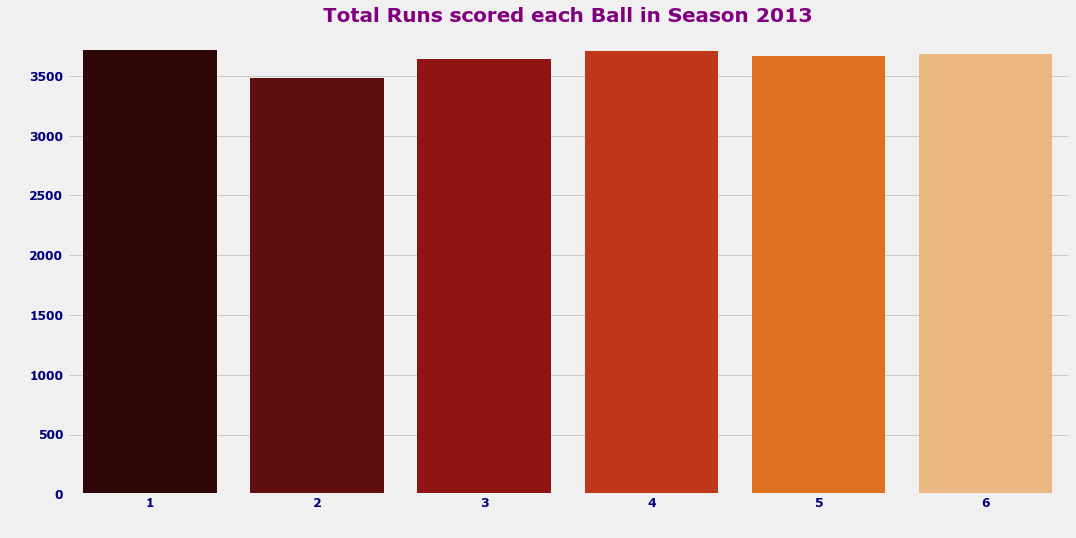

,total_runs_2014
ball,
1,2944
2,3211
3,3054
4,3086
5,2937
6,3074


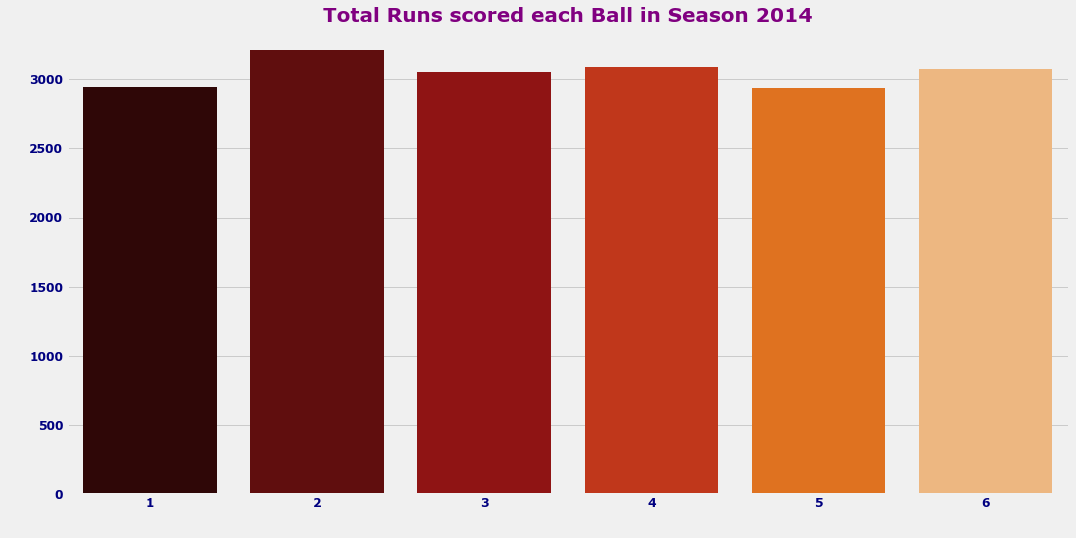

,total_runs_2015
ball,
1,2928
2,3014
3,2907
4,2934
5,3016
6,2870


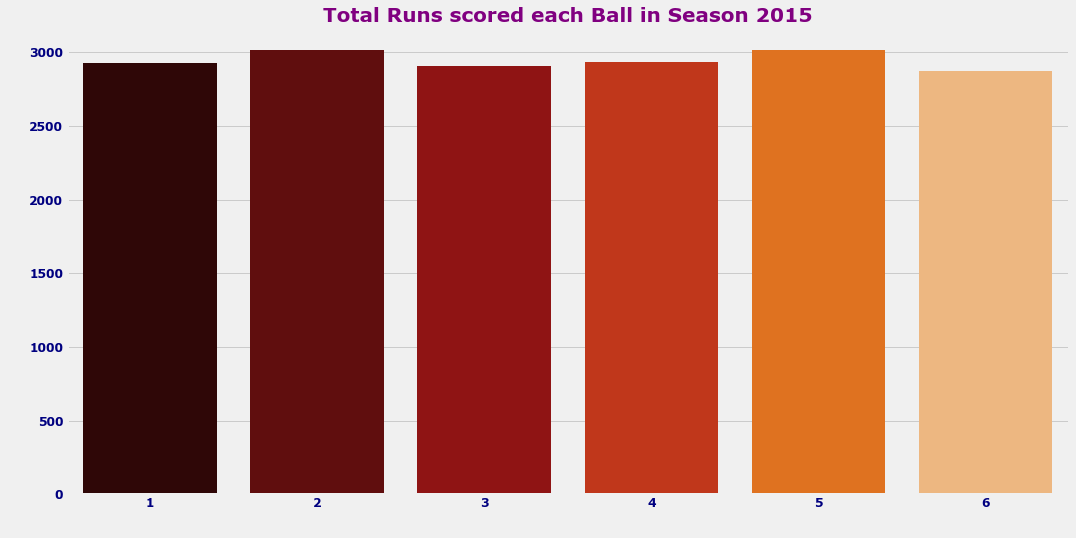

,total_runs_2016
ball,
1,2894
2,3049
3,3041
4,3035
5,3127
6,3019


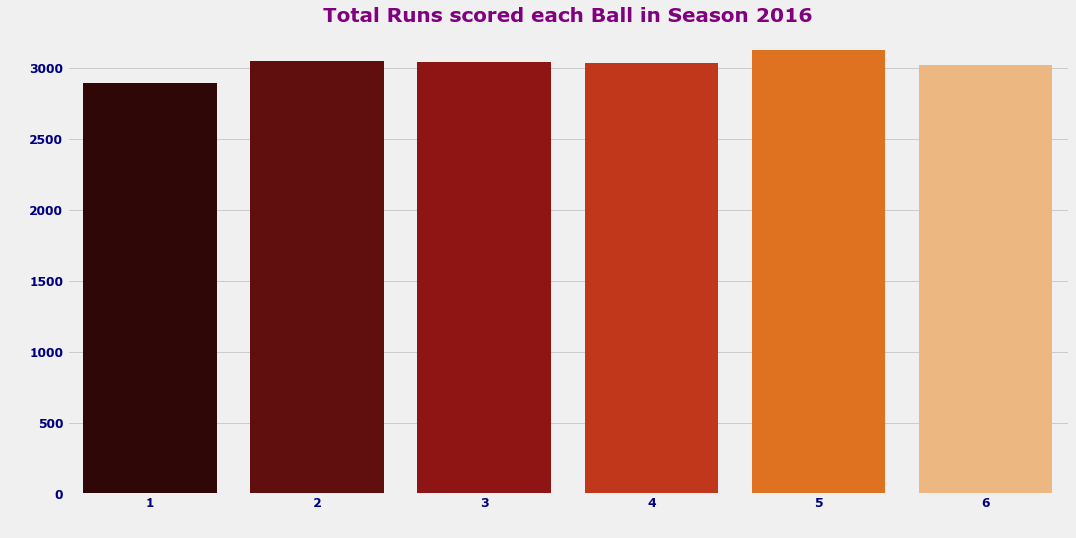

In [18]:
years_list = df.season.unique().tolist()

for i in years_list:
    display(df[(df.season == i) & (df.ball < 7)]\
            .groupby(['ball']).sum()[['total_runs']]\
            .rename({'total_runs': f'total_runs_{i}'}, axis = 1).head(10)\
            .style.background_gradient('copper_r'))
    run_each_ball = df[(df.season == i) & (df.ball < 7)]\
            .groupby(['ball']).sum()[['total_runs']]\
            .rename({'total_runs': f'total_runs_{i}'}, axis = 1).reset_index().head(10)
    plt.figure(figsize = (16,8))
    sns.barplot(x=run_each_ball['ball'],y=run_each_ball[f'total_runs_{i}'], palette='gist_heat')
    plt.title(f'Total Runs scored each Ball in Season {i}', fontsize = 20, fontweight = 'bold', color = 'purple')
    plt.xlabel(' ')
    plt.ylabel(' ')
    plt.xticks(fontsize = 12, fontweight = 'bold', color = 'navy')
    plt.yticks(fontsize = 12, fontweight = 'bold', color = 'navy')
    plt.show();

## **Total number of runs scored in each over of the innings in every season**

,total_runs_2017
over,
1,771
2,921
3,1090
4,1004
5,1002
6,1107
7,794
8,815
9,922


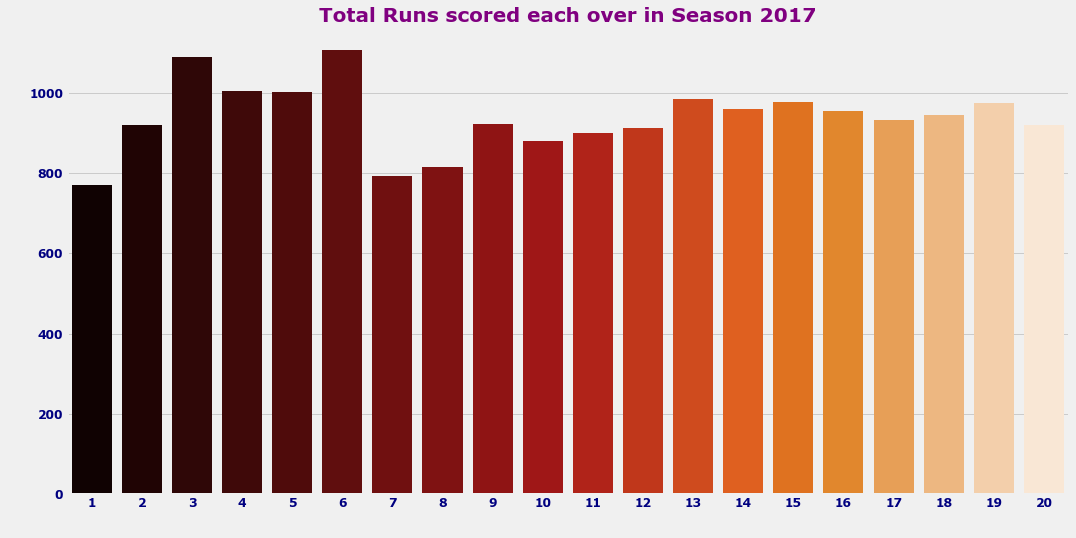

,total_runs_2008
over,
1,703
2,923
3,826
4,912
5,1017
6,977
7,828
8,852
9,844


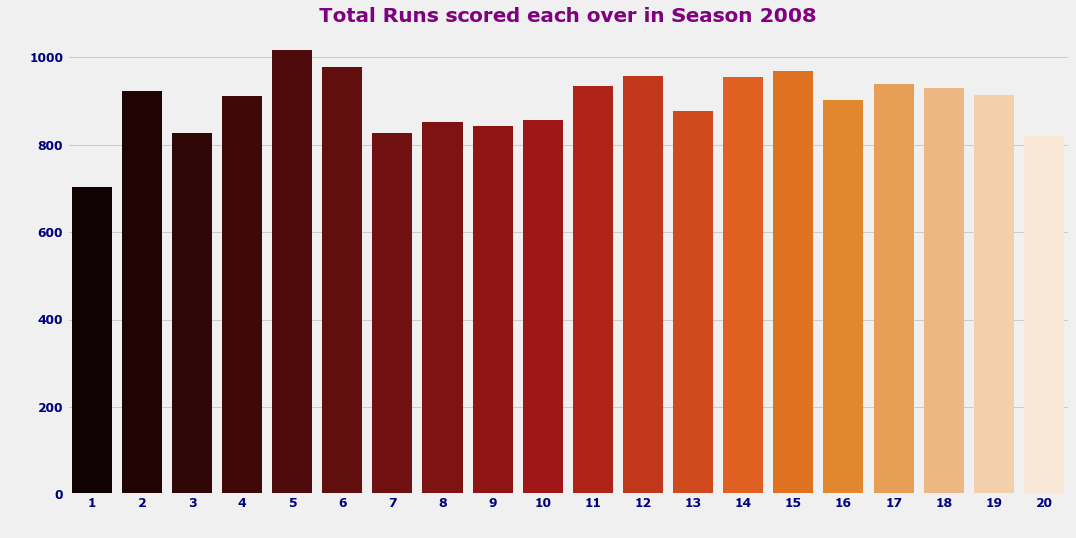

,total_runs_2009
over,
1,634
2,768
3,821
4,881
5,927
6,902
7,640
8,752
9,778


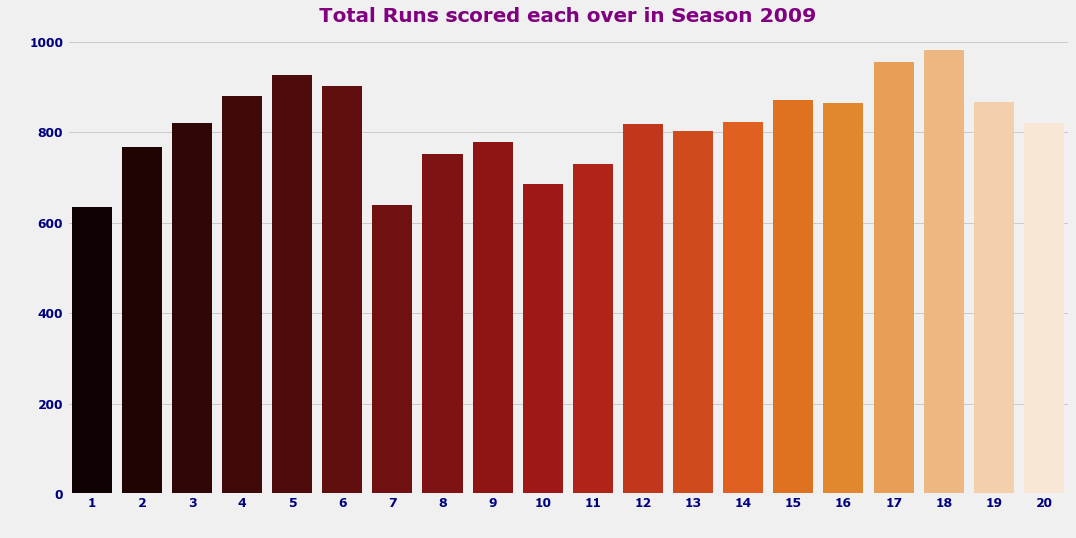

,total_runs_2010
over,
1,766
2,979
3,951
4,1016
5,1024
6,946
7,873
8,845
9,899


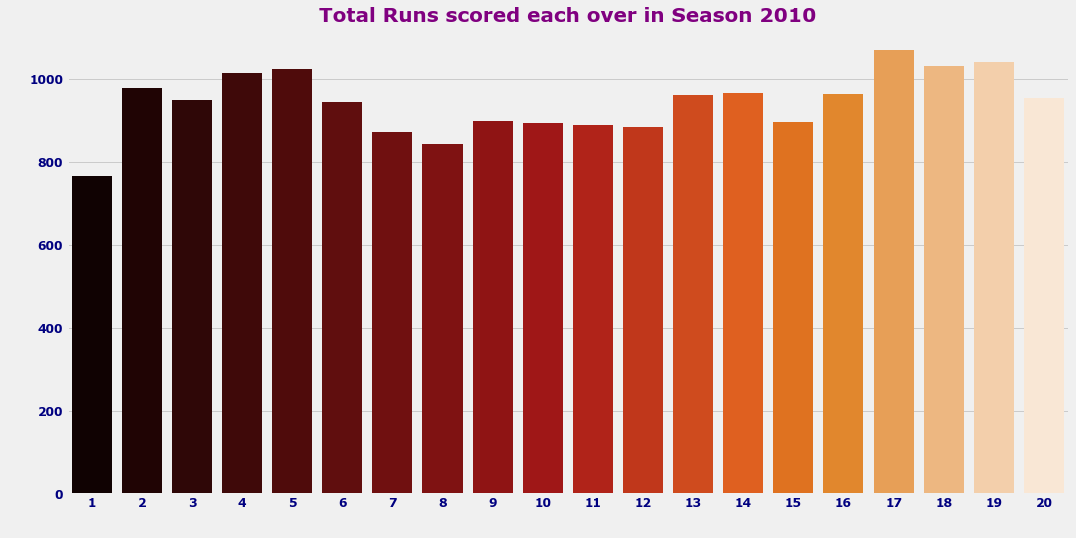

,total_runs_2011
over,
1,922
2,978
3,1132
4,1047
5,1048
6,1137
7,875
8,1104
9,1080


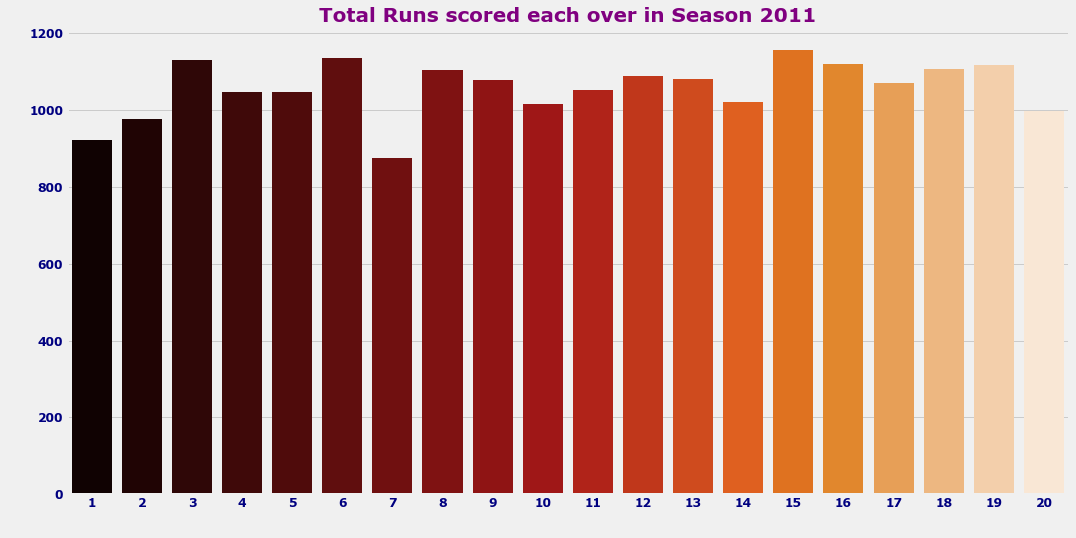

,total_runs_2012
over,
1,809
2,952
3,1045
4,1195
5,1144
6,1267
7,958
8,1068
9,1020


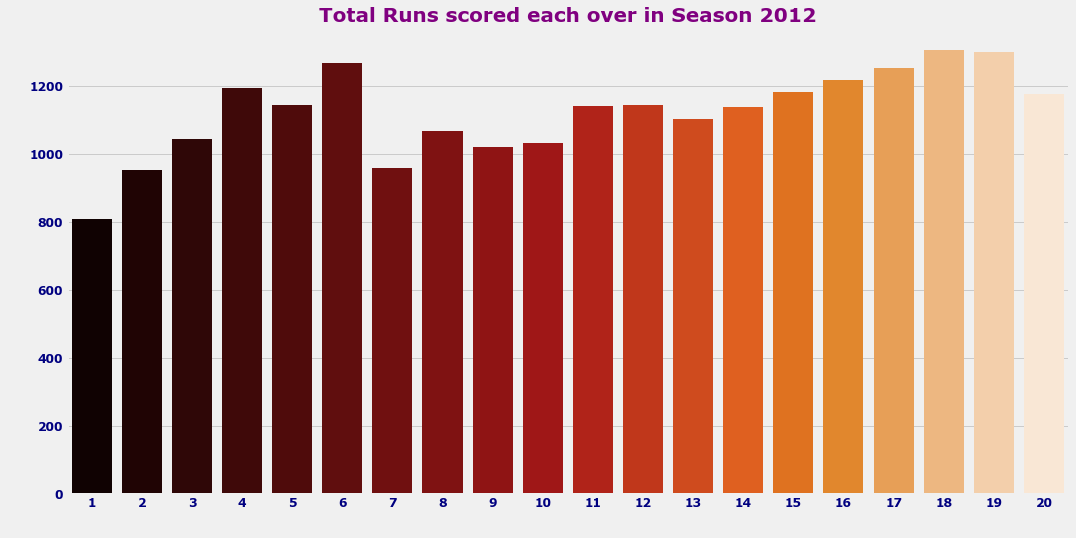

,total_runs_2013
over,
1,785
2,997
3,1095
4,1068
5,1184
6,1193
7,979
8,1031
9,1060


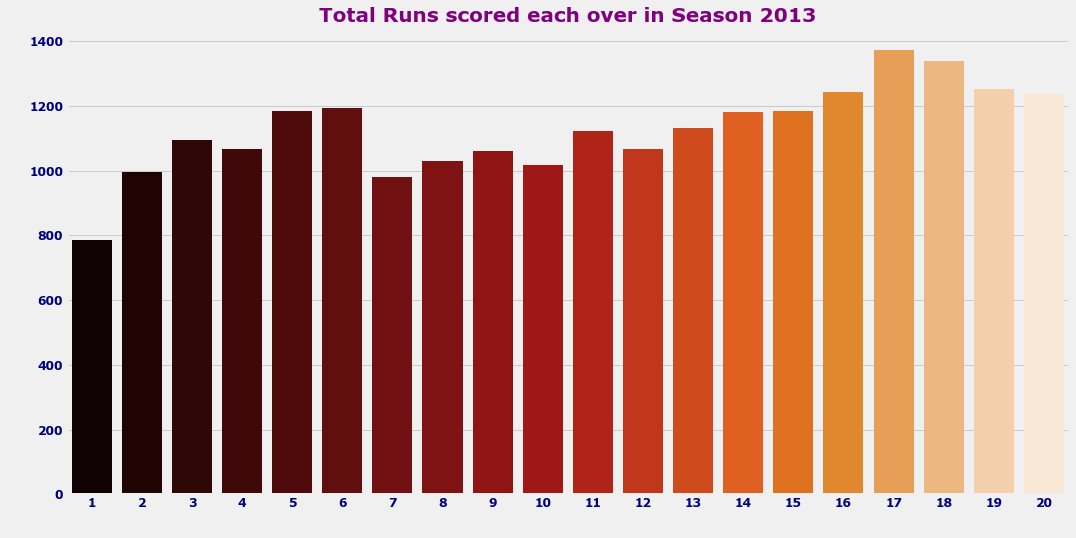

,total_runs_2014
over,
1,774
2,762
3,921
4,1002
5,964
6,1002
7,832
8,821
9,830


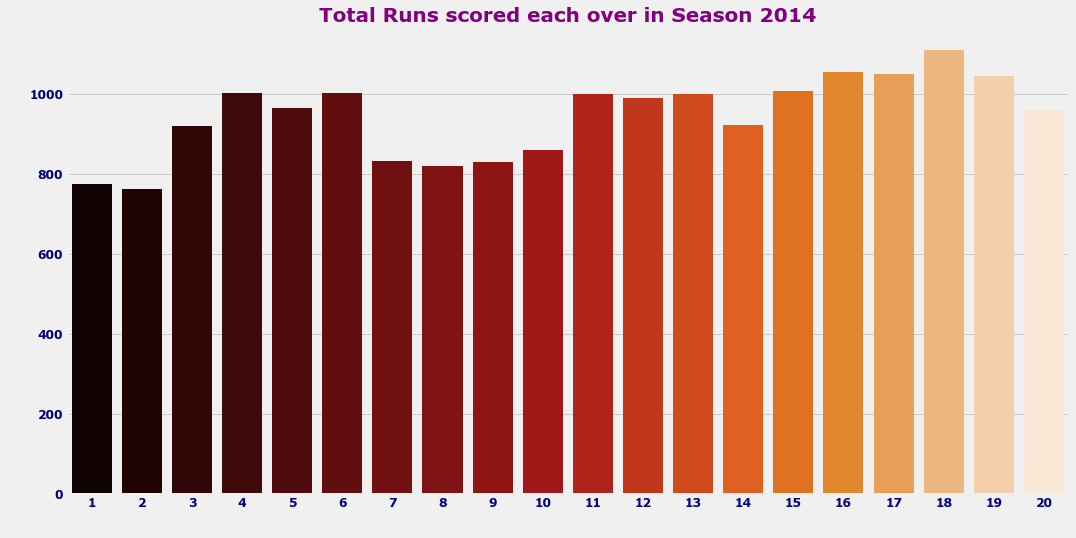

,total_runs_2015
over,
1,691
2,874
3,1018
4,1001
5,923
6,900
7,814
8,800
9,880


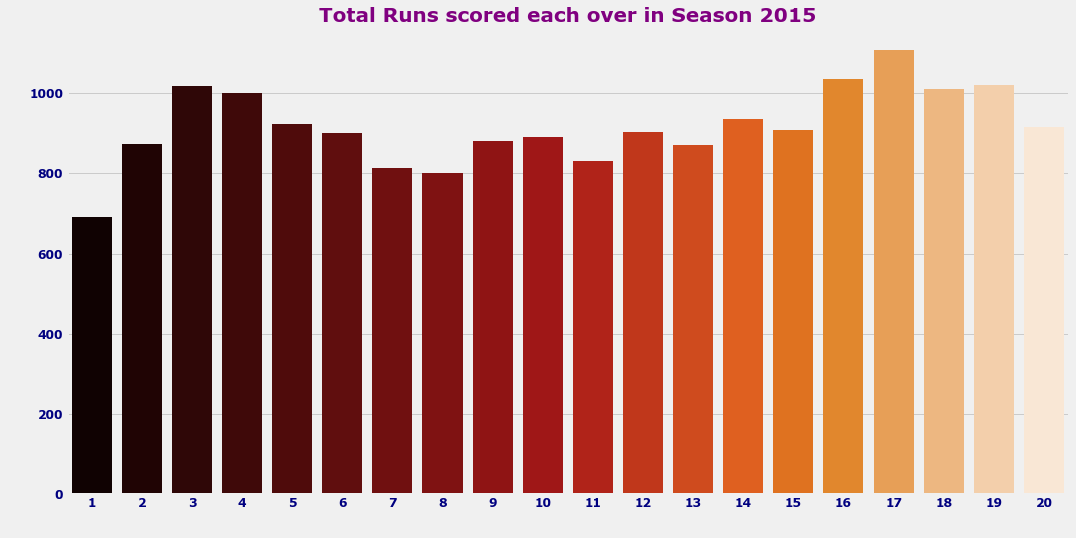

,total_runs_2016
over,
1,705
2,839
3,953
4,1081
5,994
6,966
7,820
8,878
9,934


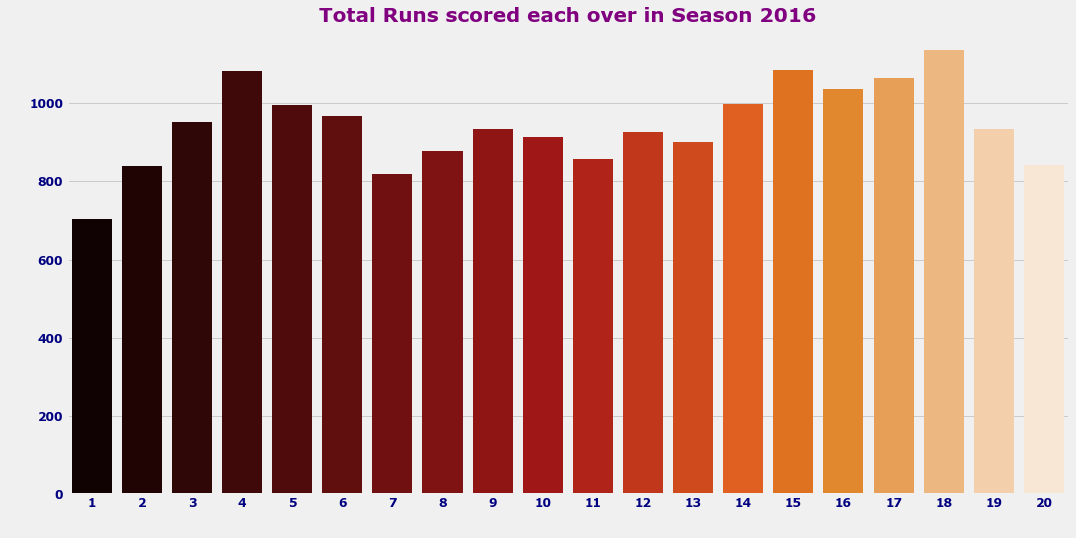

In [19]:
years_list = df.season.unique().tolist()

for i in years_list:
    display(df[(df.season == i) & (df.is_super_over == 0)]\
            .groupby(['over']).sum()[['total_runs']]\
            .rename({'total_runs': f'total_runs_{i}'}, axis = 1)\
            .style.background_gradient('copper_r'))
    run_each_over = df[(df.season == i) & (df.is_super_over == 0)]\
            .groupby(['over']).sum()[['total_runs']]\
            .rename({'total_runs': f'total_runs_{i}'}, axis = 1).reset_index()
    plt.figure(figsize = (16,8))
    sns.barplot(x=run_each_over['over'],y=run_each_over[f'total_runs_{i}'], palette='gist_heat')
    plt.title(f'Total Runs scored each over in Season {i}', fontsize = 20, fontweight = 'bold', color = 'purple')
    plt.xlabel(' ')
    plt.ylabel(' ')
    plt.xticks(fontsize = 12, fontweight = 'bold', color = 'navy')
    plt.yticks(fontsize = 12, fontweight = 'bold', color = 'navy')
    plt.show();

## **Total number of wickets in each over in every season**

,wickets_2017
over,
1,28
2,30
3,25
4,26
5,36
6,37
7,23
8,25
9,29


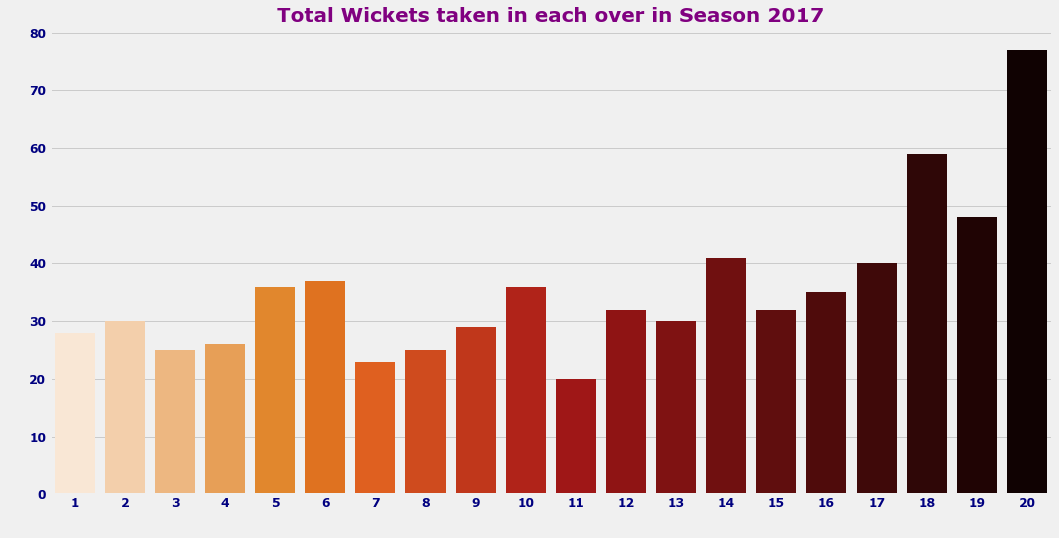

,wickets_2008
over,
1,19
2,26
3,38
4,31
5,30
6,33
7,27
8,21
9,32


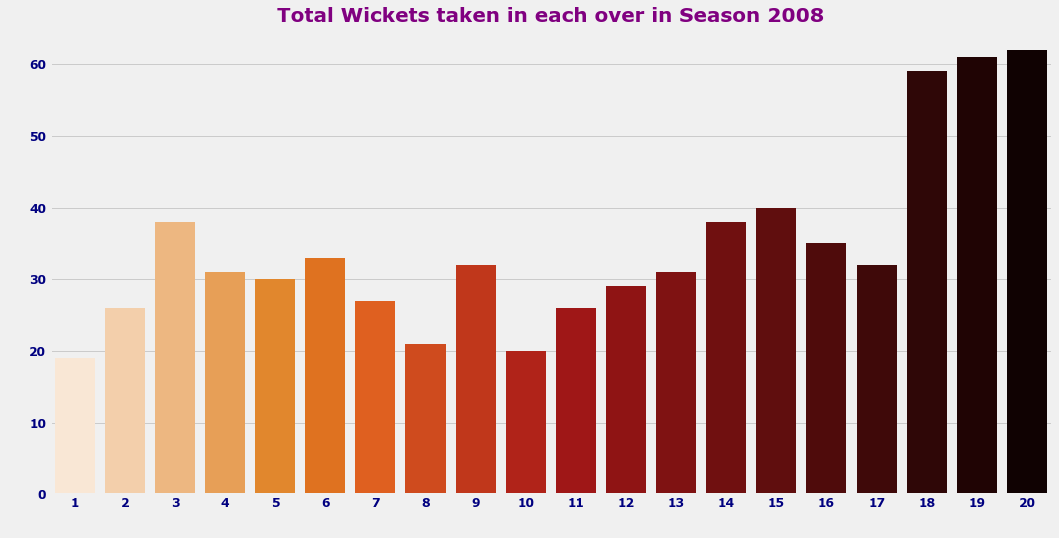

,wickets_2009
over,
1,38
2,33
3,26
4,26
5,31
6,33
7,30
8,17
9,27


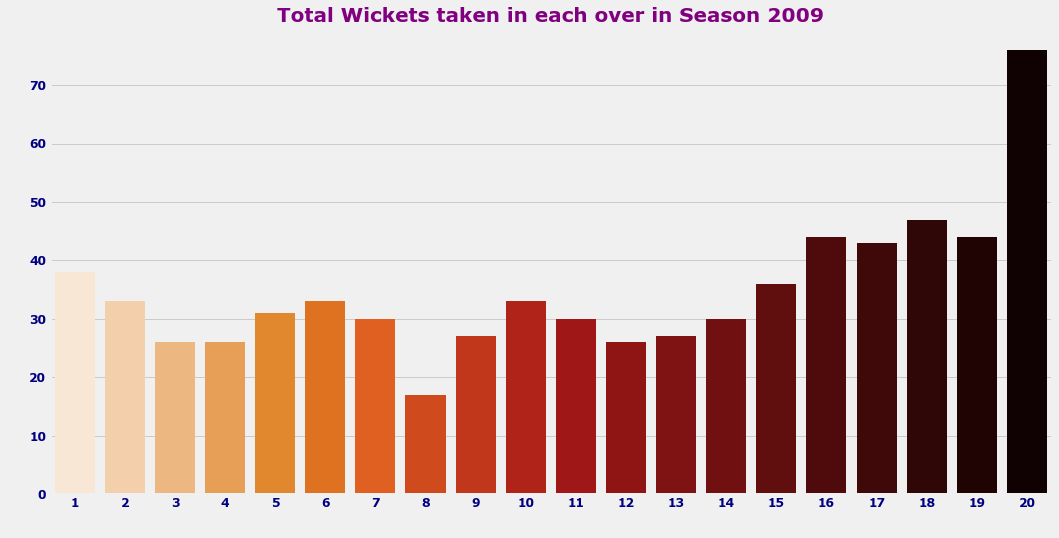

,wickets_2010
over,
1,22
2,25
3,36
4,33
5,35
6,26
7,29
8,22
9,28


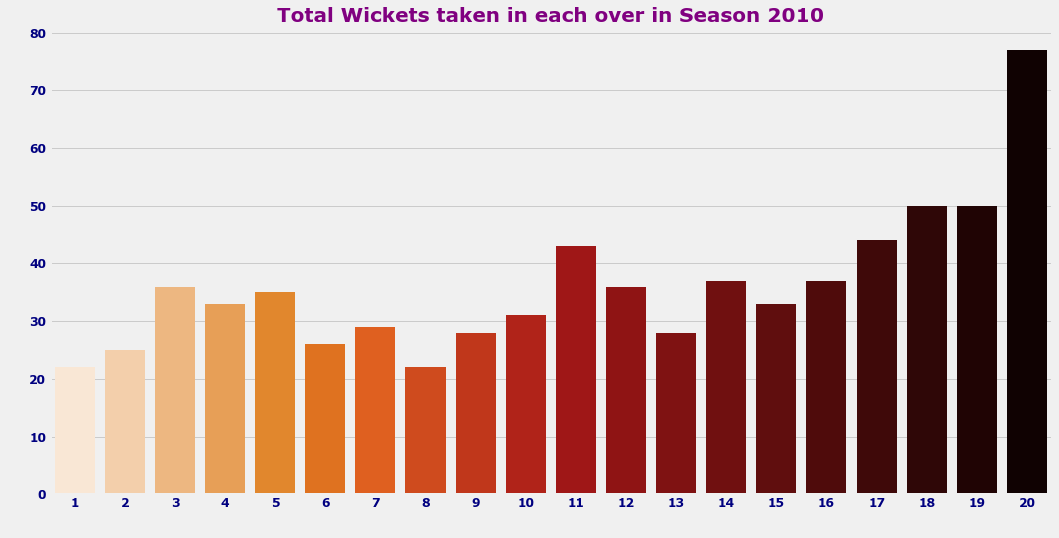

,wickets_2011
over,
1,24
2,35
3,33
4,44
5,35
6,39
7,24
8,30
9,34


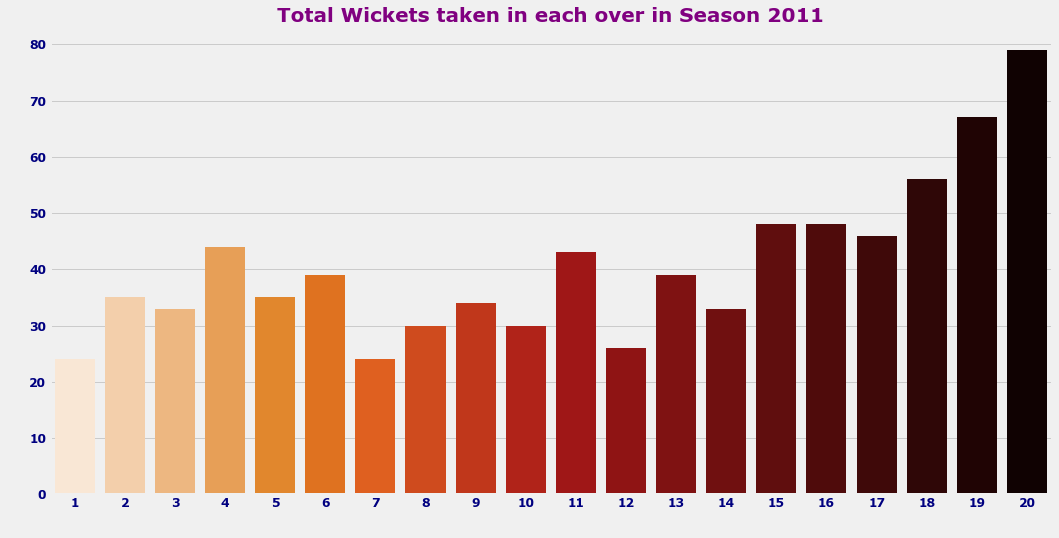

,wickets_2012
over,
1,26
2,40
3,33
4,31
5,25
6,41
7,27
8,28
9,40


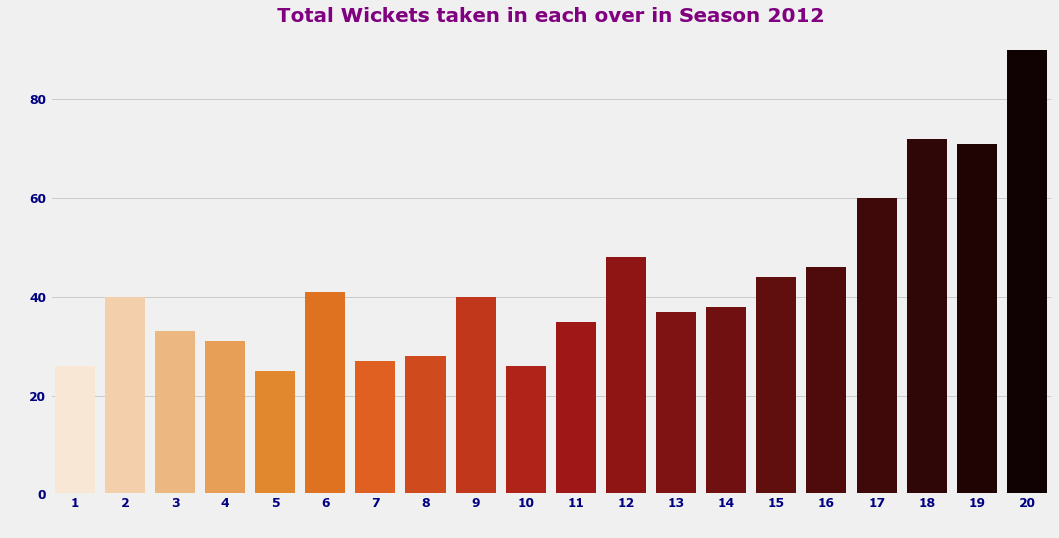

,wickets_2013
over,
1,32
2,37
3,44
4,32
5,40
6,30
7,33
8,55
9,29


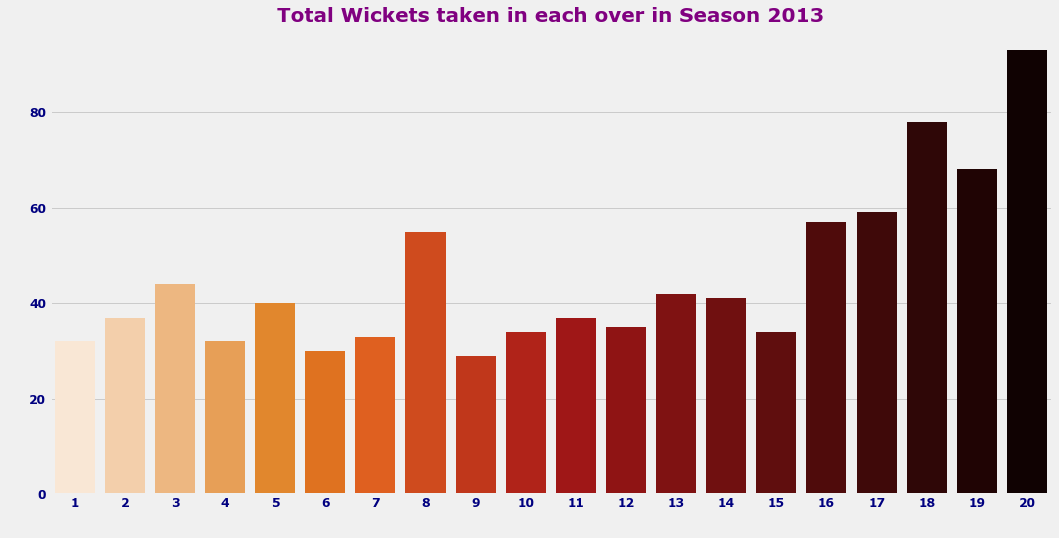

,wickets_2014
over,
1,18
2,26
3,37
4,23
5,29
6,30
7,32
8,22
9,27


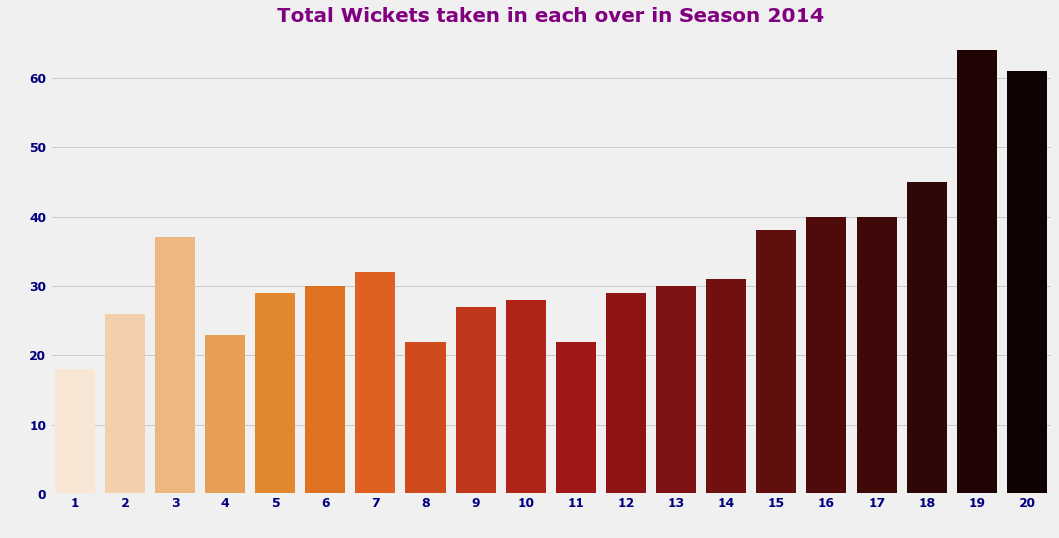

,wickets_2015
over,
1,23
2,14
3,26
4,24
5,46
6,38
7,22
8,24
9,34


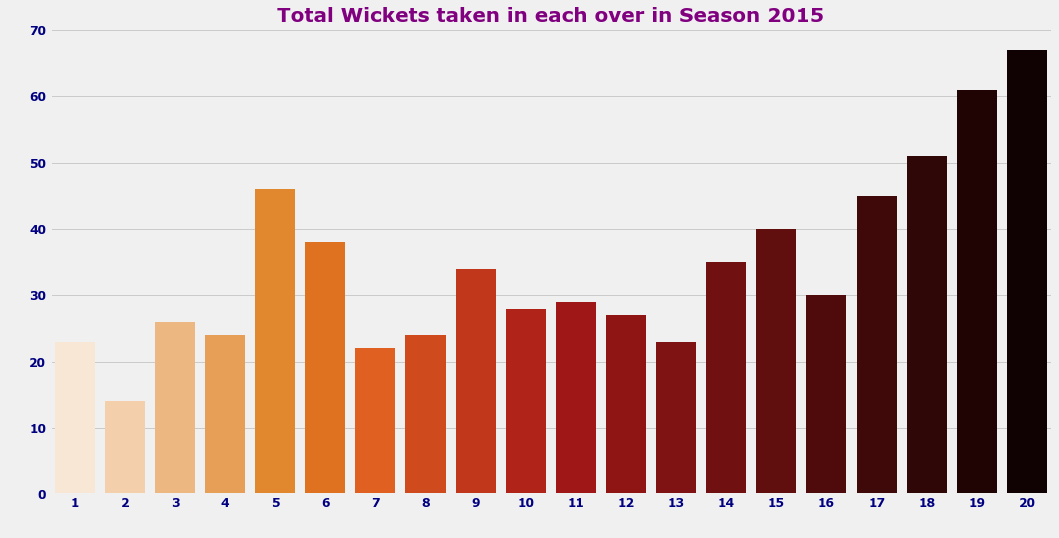

,wickets_2016
over,
1,22
2,33
3,23
4,38
5,24
6,20
7,17
8,24
9,27


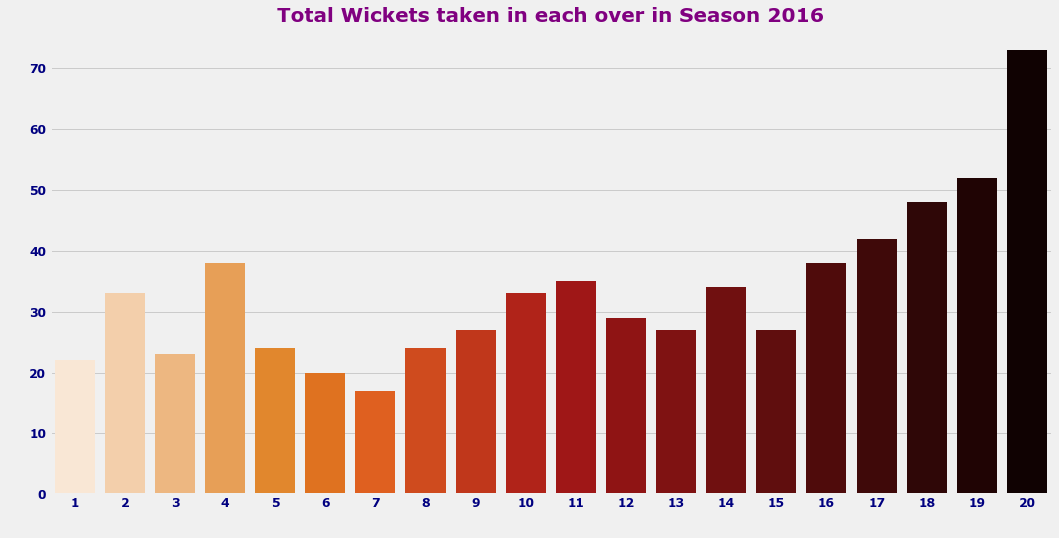

In [20]:
years_list = df.season.unique().tolist()


for i in years_list:
    display(df[(df.season == i) & (df.is_super_over == 0) & (df.player_dismissed != 'Not Applicable')]\
            .groupby(['over']).count()[['player_dismissed']]\
            .rename({'player_dismissed': f'wickets_{i}'}, axis = 1)\
            .style.background_gradient('copper_r'))
    run_each_over = df[(df.season == i) & (df.is_super_over == 0) & 
                       (df.player_dismissed != 'Not Applicable')]\
            .groupby(['over']).count()[['player_dismissed']]\
            .rename({'player_dismissed': f'wickets_{i}'}, axis = 1).reset_index()
    plt.figure(figsize = (16,8))
    sns.barplot(x=run_each_over['over'],y=run_each_over[f'wickets_{i}'], palette='gist_heat_r')
    plt.title(f'Total Wickets taken in each over in Season {i}', fontsize = 20, fontweight = 'bold', color = 'purple')
    plt.xlabel(' ')
    plt.ylabel(' ')
    plt.xticks(fontsize = 12, fontweight = 'bold', color = 'navy')
    plt.yticks(fontsize = 12, fontweight = 'bold', color = 'navy')
    plt.show();

## **Sixes and Fours Across the Season**

In [21]:
total_6s = df[df["batsman_runs"] == 6].groupby("season")["batsman_runs"].agg(['count', 'sum'])\
        .rename({'count': '6s', 'sum': 'RunsBy6'}, axis = 1)
display(total_6s.sort_values(by = 'RunsBy6', ascending = False).style.background_gradient('RdBu', subset = ['RunsBy6']))

total_4s = df[df["batsman_runs"] == 4].groupby("season")["batsman_runs"].agg(['count', 'sum'])\
        .rename({'count': '4s', 'sum': 'RunsBy4'}, axis = 1)

display(total_4s.sort_values(by = 'RunsBy4', ascending = False).style.background_gradient('RdBu', subset = ['RunsBy4']))

,6s,RunsBy6
season,,
2012,733,4398
2014,715,4290
2017,706,4236
2015,692,4152
2013,681,4086
2011,639,3834
2016,639,3834
2008,623,3738
2010,587,3522


,4s,RunsBy4
season,,
2013,2054,8216
2011,1916,7664
2012,1911,7644
2010,1709,6836
2008,1703,6812
2016,1633,6532
2017,1612,6448
2015,1611,6444
2014,1563,6252


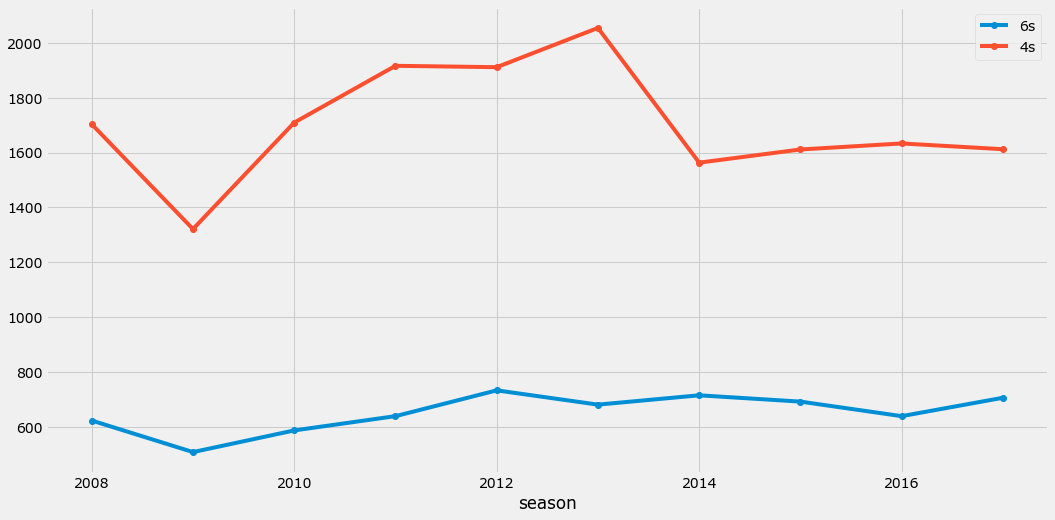

In [22]:
# plt.figure()
Season_boundaries = total_6s.reset_index().merge(total_4s.reset_index(),left_on='season',right_on='season',how='left')
Season_boundaries.set_index('season')[['6s','4s']].plot(marker='o', figsize = (16,8));
# Season_boundaries

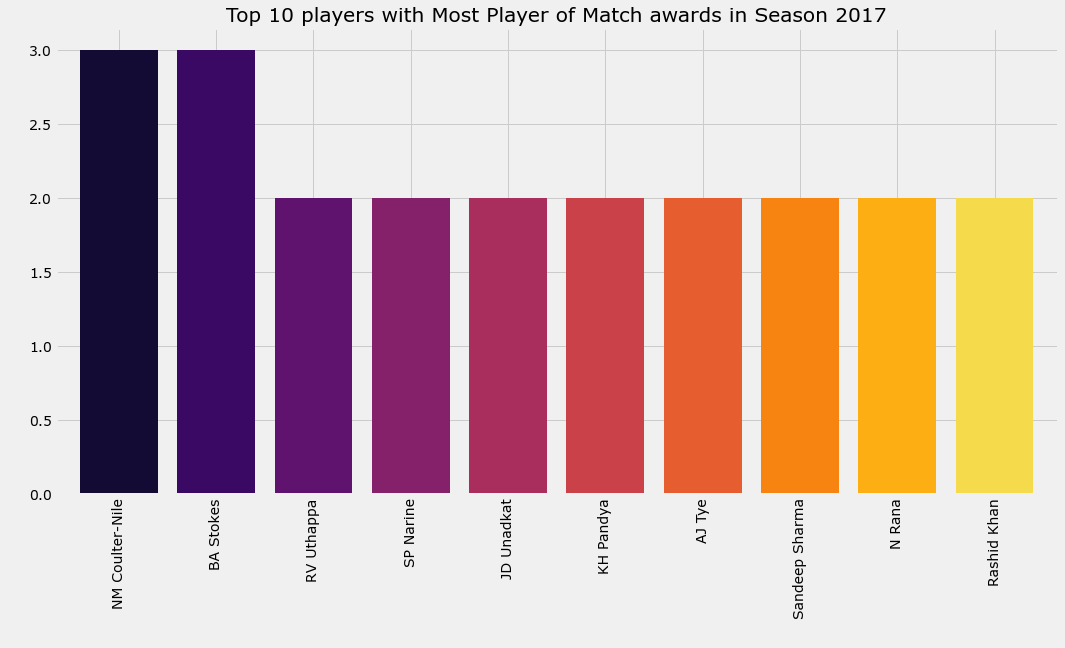

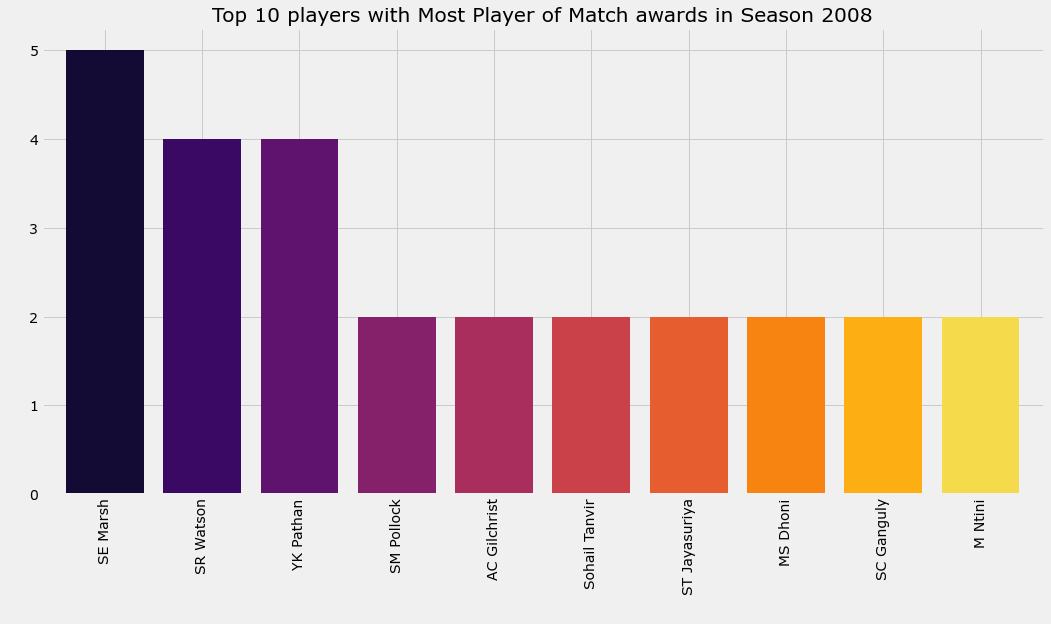

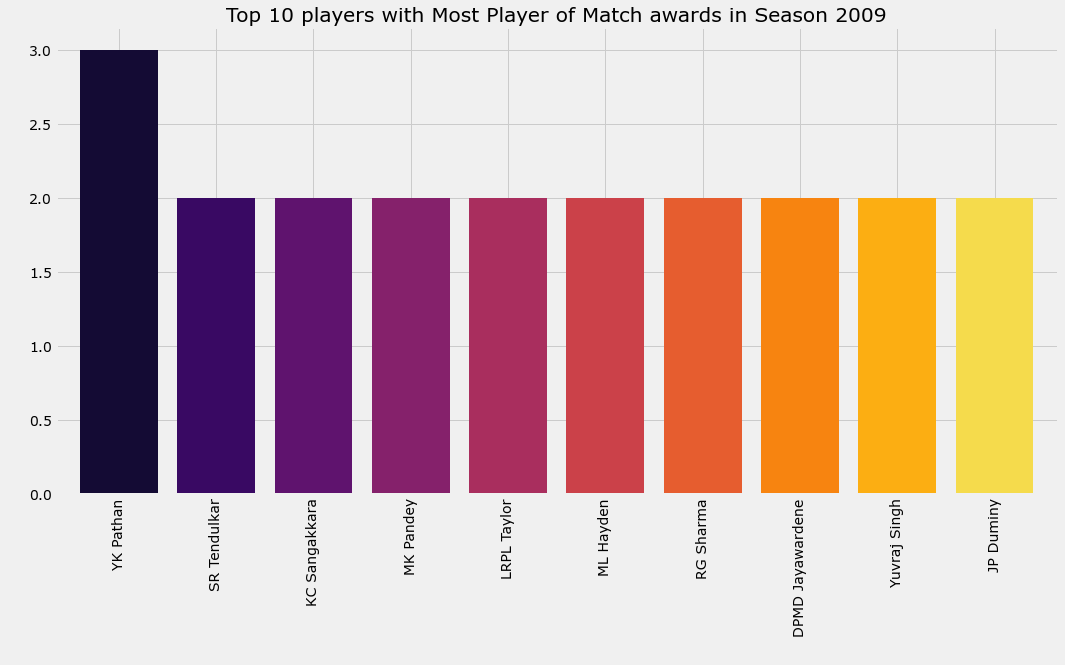

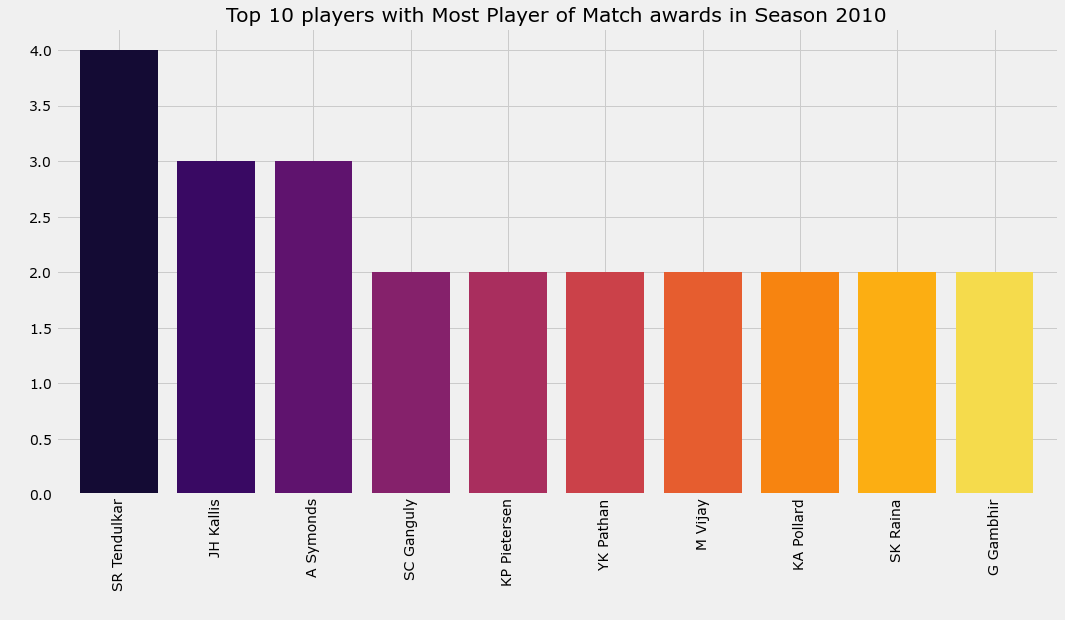

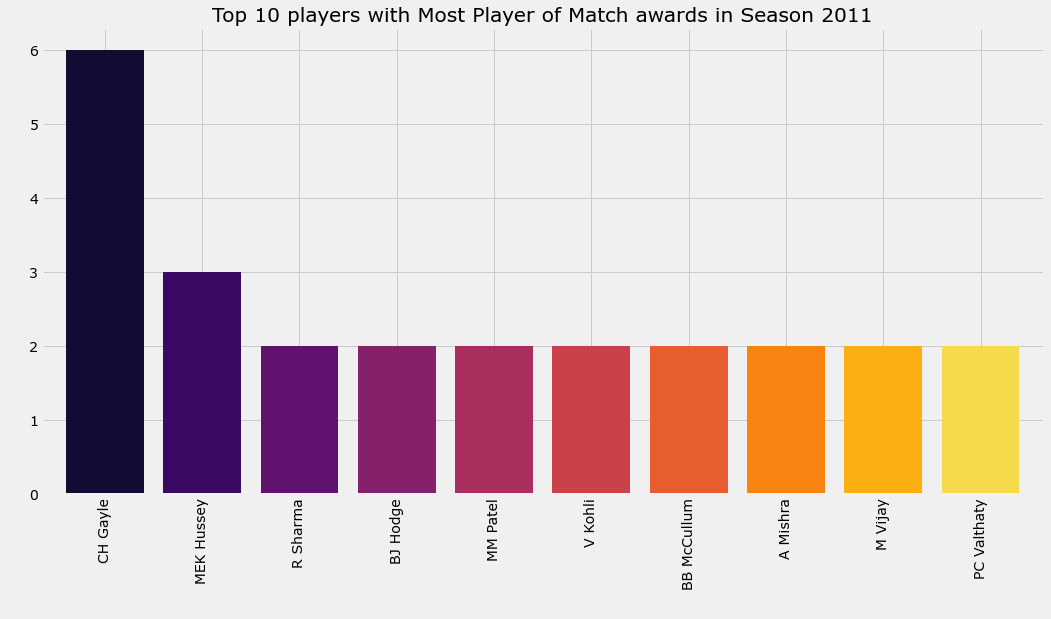

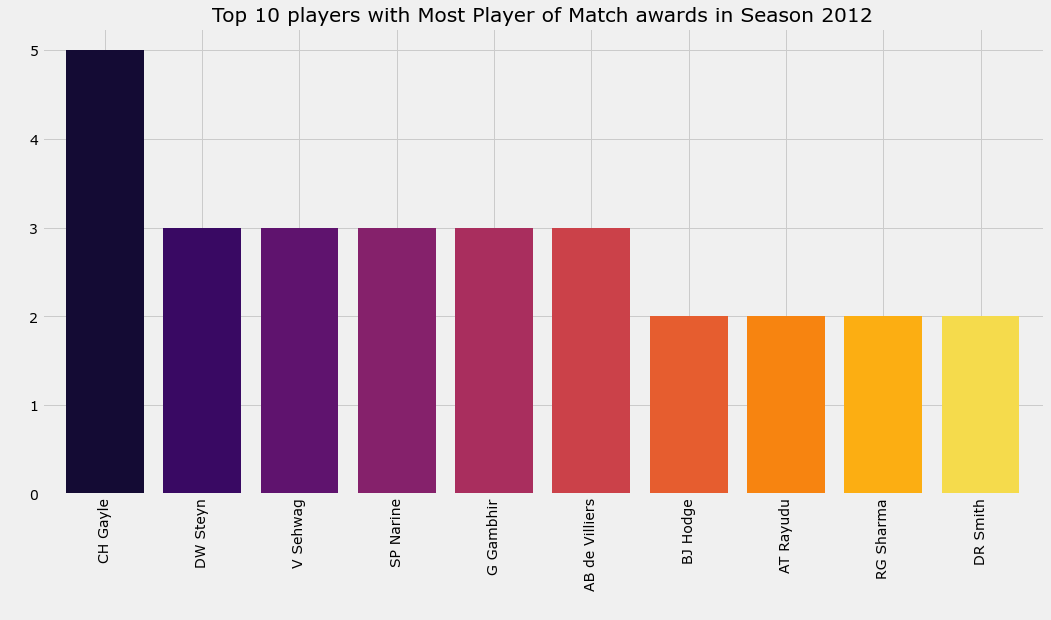

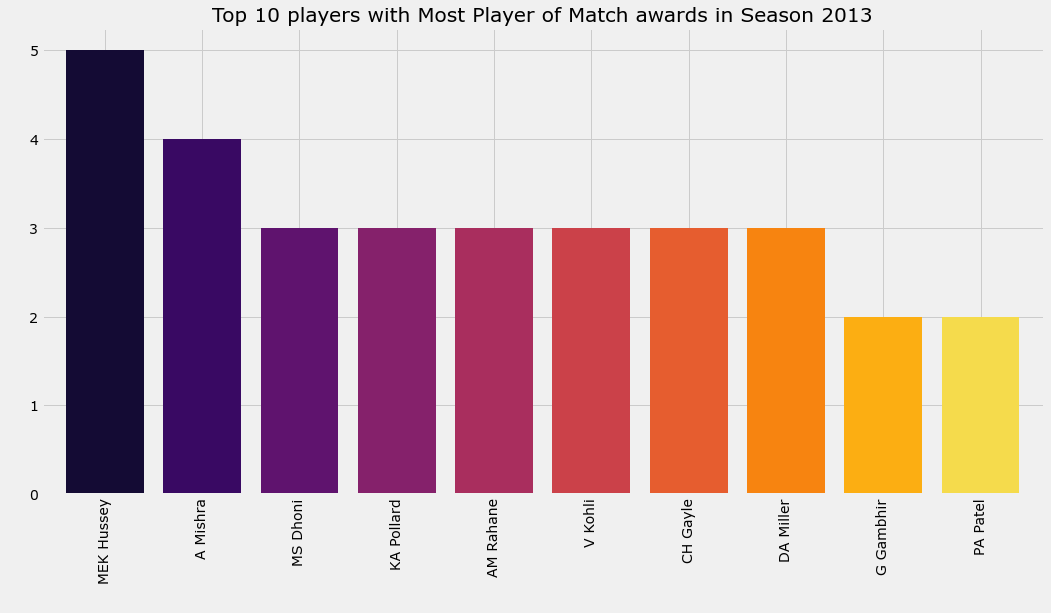

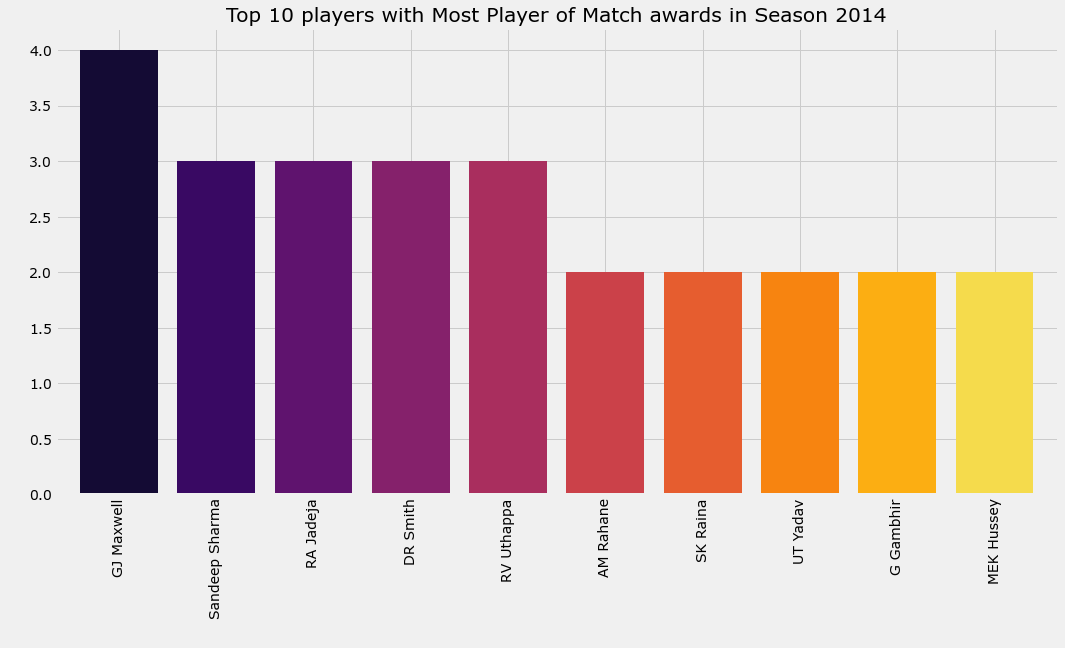

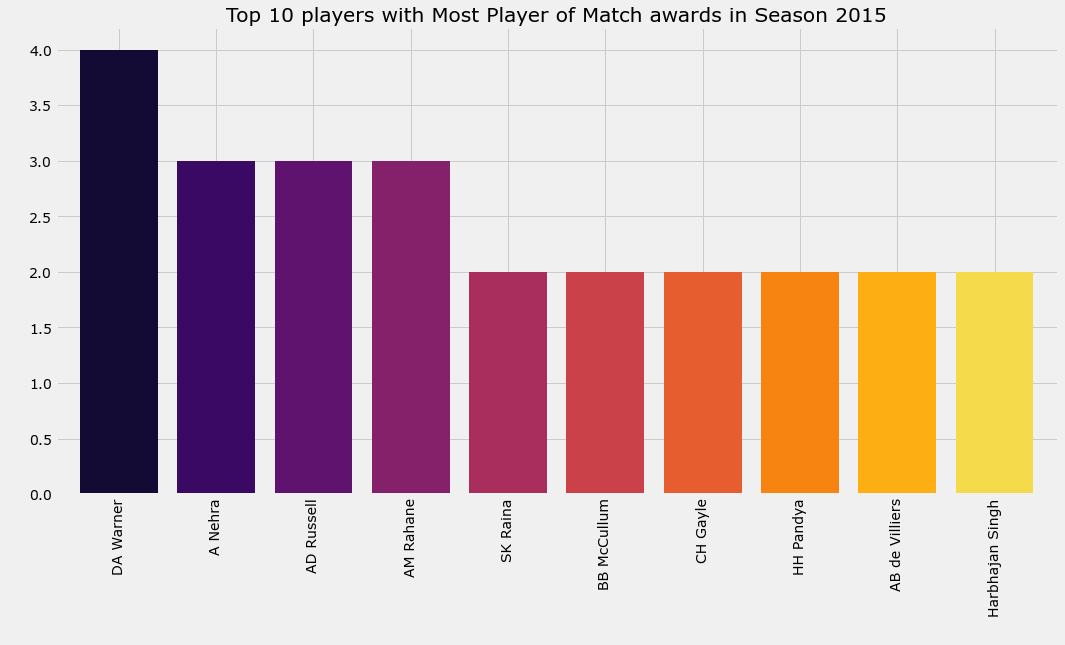

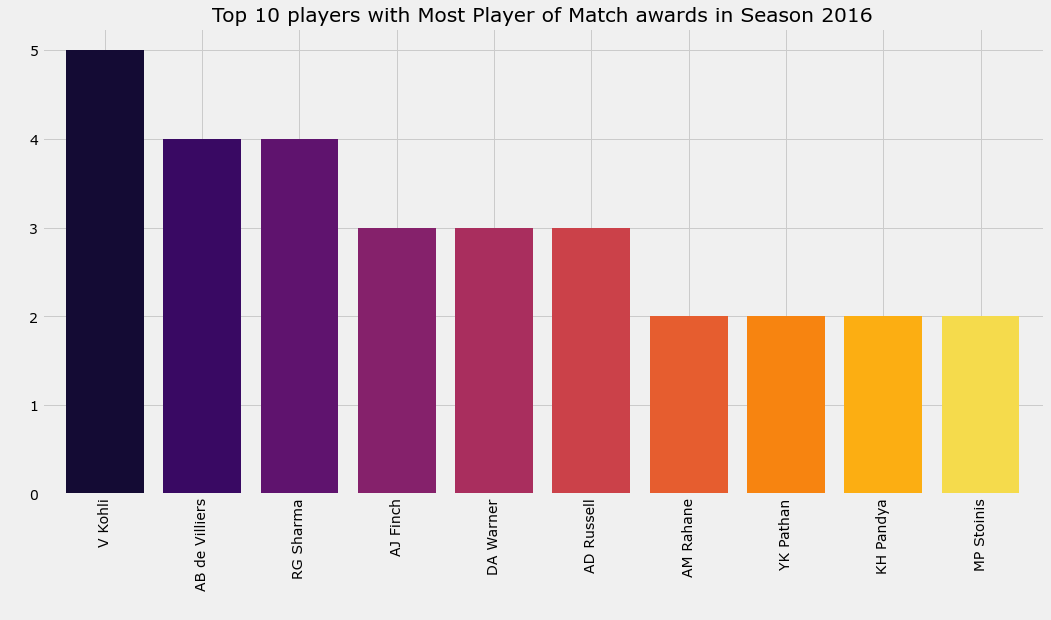

In [23]:

#the code used is very basic but gets the job done easily
years_list = df.season.unique().tolist()
for i in years_list: 
    ax = matches[matches.season == i]['player_of_match'].value_counts().head(10).plot.\
    bar(width=.8, color=sns.color_palette('inferno',10), figsize = (16,8)) 
    ax.set_title(f'Top 10 players with Most Player of Match awards in Season {i}')
    ax.set_xlabel(' ') 
    ax.set_ylabel(' ')
#     for p in ax.patches:
#         ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.15))
    plt.show();

## **Score Distribution For Teams by Innings**

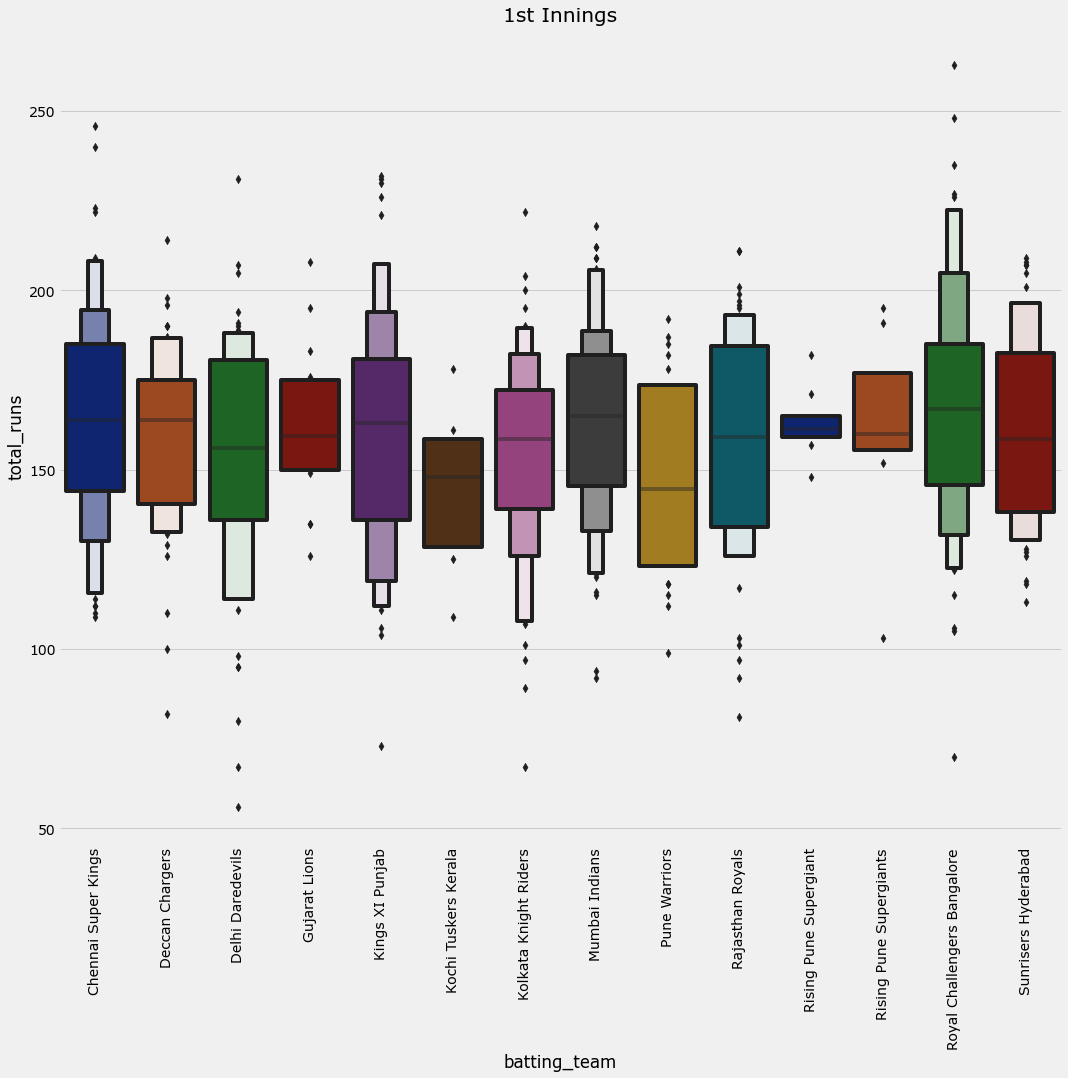

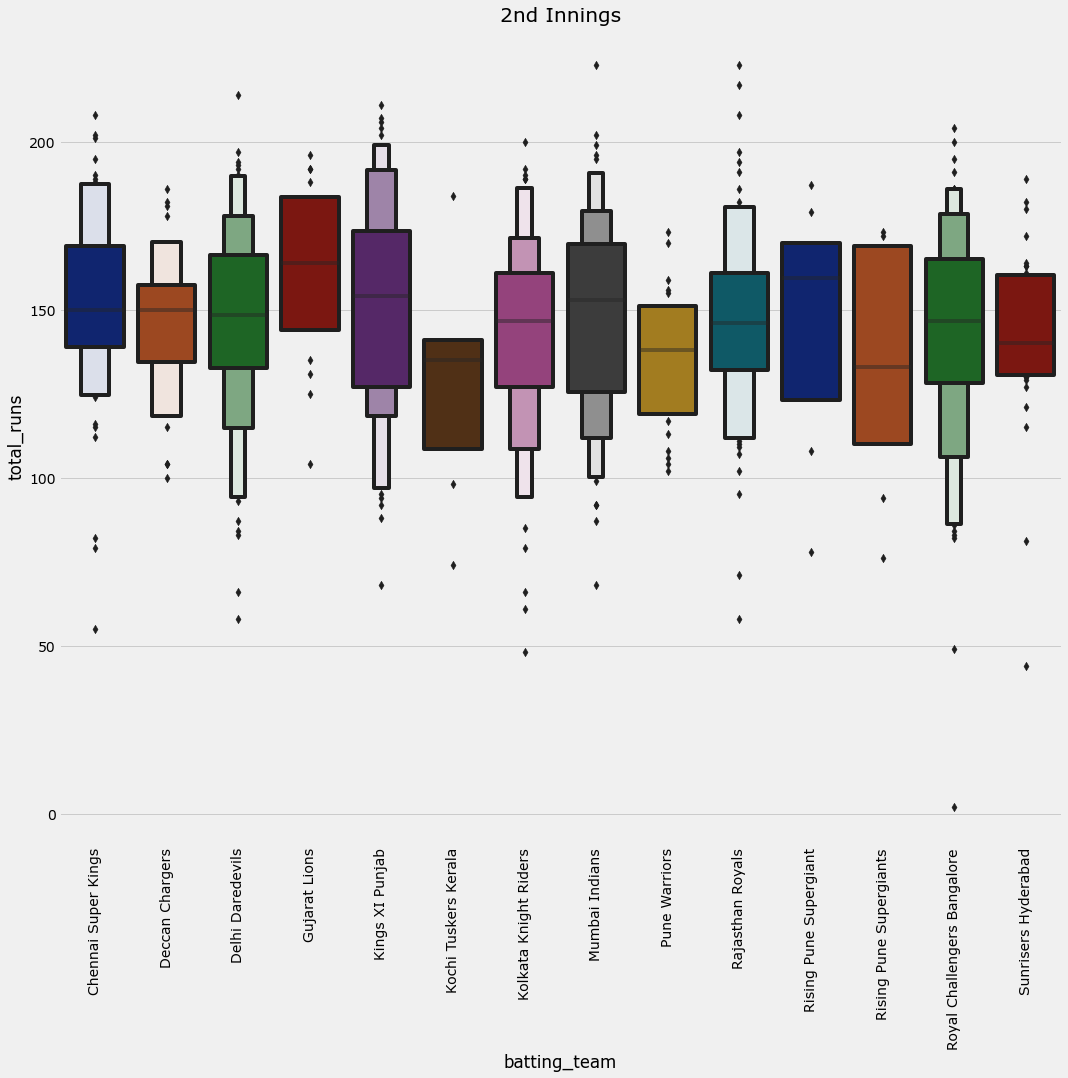

In [24]:
plt.figure(figsize=(16,14))
xyz=deliveries.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
xyz.drop('match_id',axis=1,inplace=True)
xyz=xyz.sort_values(by=['batting_team','total_runs'],ascending=True)
score_1_inning=xyz[xyz['inning']==1]
score_2_inning=xyz[xyz['inning']==2]
sns.boxenplot(x='batting_team',y='total_runs',data=score_1_inning, palette = 'dark').set_title('1st Innings')
plt.xticks(rotation = 90)
plt.show()
print('\n')
plt.figure(figsize=(16,14))
sns.boxenplot(x='batting_team',y='total_runs',data=score_2_inning, palette = 'dark').set_title('2nd Innings')
plt.xticks(rotation = 90)
plt.show();
# fig.set_size_inches(12,6)

In [25]:
high_scores=deliveries.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
#reset_index() converts the obtained series into a dataframe
high_scores=high_scores[high_scores['total_runs']>=200]
#nlargest is used to sort the given column
high_scores.nlargest(10,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,Royal Challengers Bangalore,Pune Warriors,263
1250,620,1,Royal Challengers Bangalore,Gujarat Lions,248
416,206,1,Chennai Super Kings,Rajasthan Royals,246
122,61,1,Chennai Super Kings,Kings XI Punjab,240
1134,562,1,Royal Challengers Bangalore,Mumbai Indians,235
596,296,1,Kings XI Punjab,Royal Challengers Bangalore,232
522,259,1,Delhi Daredevils,Kings XI Punjab,231
981,486,1,Kings XI Punjab,Chennai Super Kings,231
100,50,1,Kings XI Punjab,Mumbai Indians,230
1170,580,1,Royal Challengers Bangalore,Sunrisers Hyderabad,227


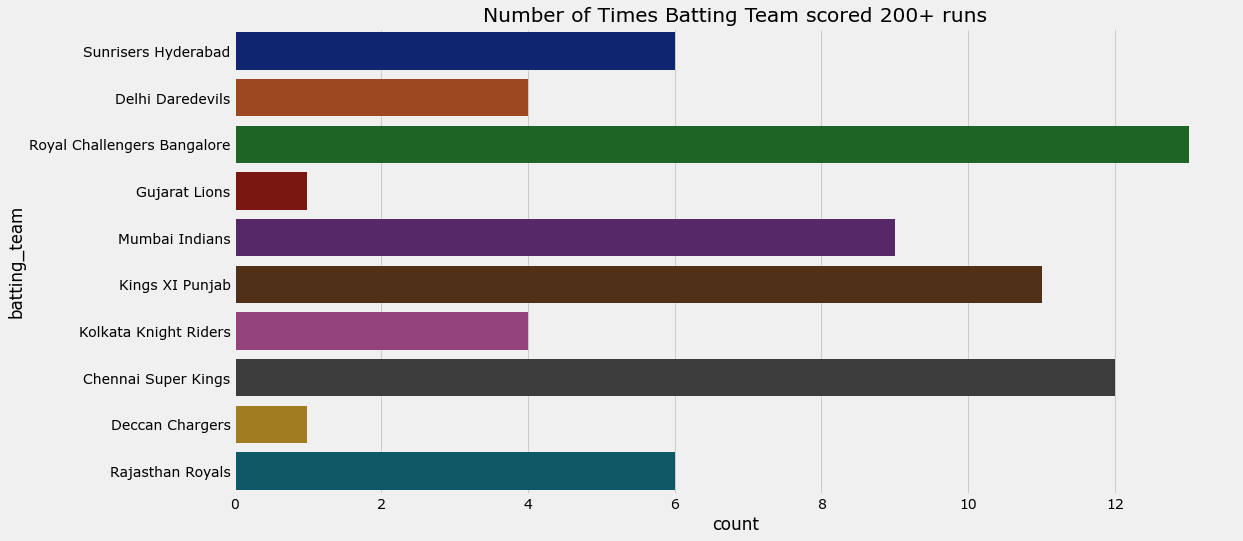

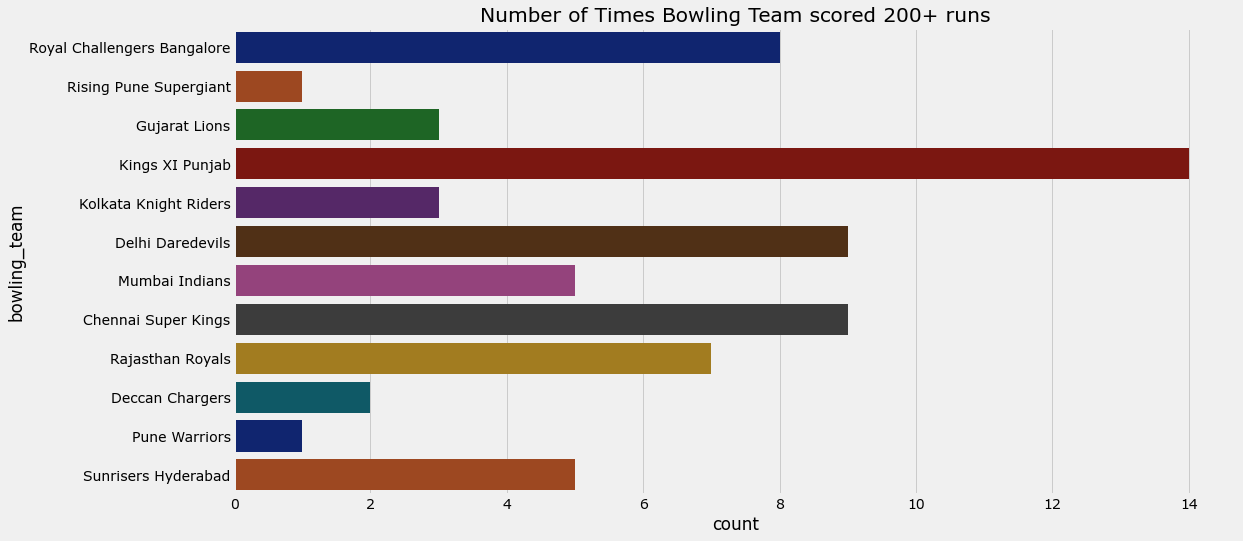

In [26]:
plt.figure(figsize = (16,8))
sns.countplot(y =high_scores['batting_team'], palette = 'dark')
plt.title('Number of Times Batting Team scored 200+ runs')
plt.show();

plt.figure(figsize = (16,8))
sns.countplot(y= high_scores['bowling_team'], palette = 'dark')
plt.title('Number of Times Bowling Team scored 200+ runs')
plt.show();

In [27]:
teams = matches['team1'].unique().tolist()
print("Teams who have'nt ever scored 200 runs",list(set(teams)-set(high_scores['batting_team'])))
print("Teams who haven't conceeded over 200 while bowling",list(set(teams)-set(high_scores['bowling_team'])))

Teams who have'nt ever scored 200 runs ['Kochi Tuskers Kerala', 'Rising Pune Supergiants', 'Rising Pune Supergiant', 'Pune Warriors']
Teams who haven't conceeded over 200 while bowling ['Kochi Tuskers Kerala', 'Rising Pune Supergiants']


## **Top Batsman's with 1's, 2's, 3's, 4's**

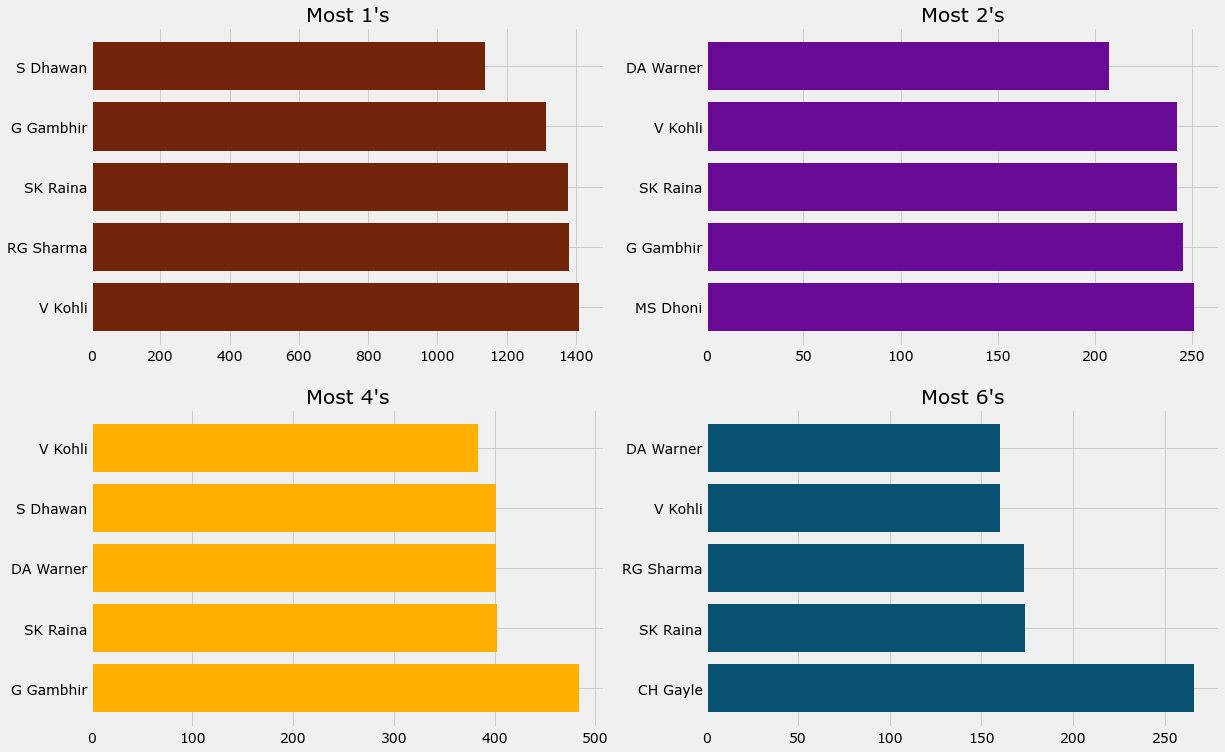

In [28]:
toppers=deliveries.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
toppers=toppers.pivot('batsman','batsman_runs','total_runs')
fig,ax=plt.subplots(2,2,figsize=(18,12))
toppers[1].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,0],color='#712409',width=0.8)
ax[0,0].set_title("Most 1's")
ax[0,0].set_ylabel('')
toppers[2].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,1],color='#680A96',width=0.8)
ax[0,1].set_title("Most 2's")
ax[0,1].set_ylabel('')
toppers[4].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,0],color='#FFAF00',width=0.8)
ax[1,0].set_title("Most 4's")
ax[1,0].set_ylabel('')
toppers[6].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,1],color='#095171',width=0.8)
ax[1,1].set_title("Most 6's")
ax[1,1].set_ylabel('')
plt.show()

## **Individual Scores By Top Batsman each Inning**

In [29]:
top_scores = deliveries.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
#top_scores=top_scores[top_scores['batsman_runs']>100]
top_scores.sort_values('batsman_runs', ascending=0).head(10)
top_scores.nlargest(10,'batsman_runs')

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,Royal Challengers Bangalore,175
900,60,BB McCullum,Kolkata Knight Riders,158
8426,562,AB de Villiers,Royal Challengers Bangalore,133
9257,620,AB de Villiers,Royal Challengers Bangalore,129
5585,372,CH Gayle,Royal Challengers Bangalore,128
3135,206,M Vijay,Chennai Super Kings,127
529,36,DA Warner,Sunrisers Hyderabad,126
7752,516,V Sehwag,Kings XI Punjab,122
3686,243,PC Valthaty,Kings XI Punjab,120
4223,279,V Sehwag,Delhi Daredevils,119


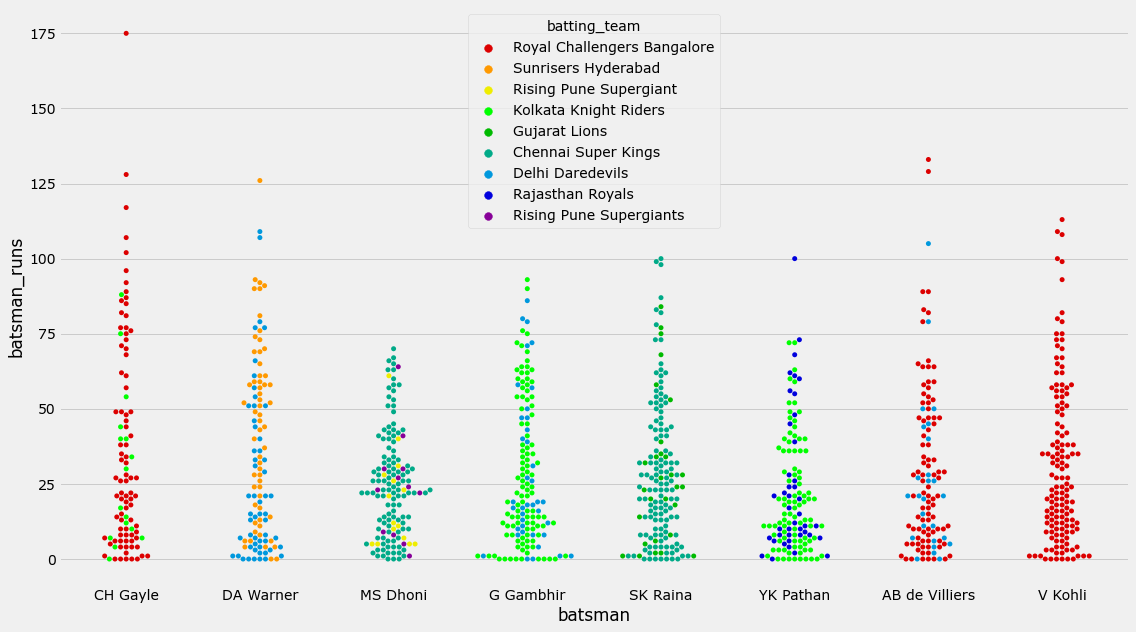

In [30]:
swarm=['CH Gayle','V Kohli','G Gambhir','SK Raina','YK Pathan','MS Dhoni','AB de Villiers','DA Warner']
scores = deliveries.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
scores=scores[top_scores['batsman'].isin(swarm)]
plt.figure(figsize = (16,9))
sns.swarmplot(x='batsman',y='batsman_runs',data=scores,hue='batting_team',palette='nipy_spectral_r')
# plt.ylim(-10,200)
plt.tight_layout()
plt.show()

## **Runs Scored By Batsman Across Seasons**

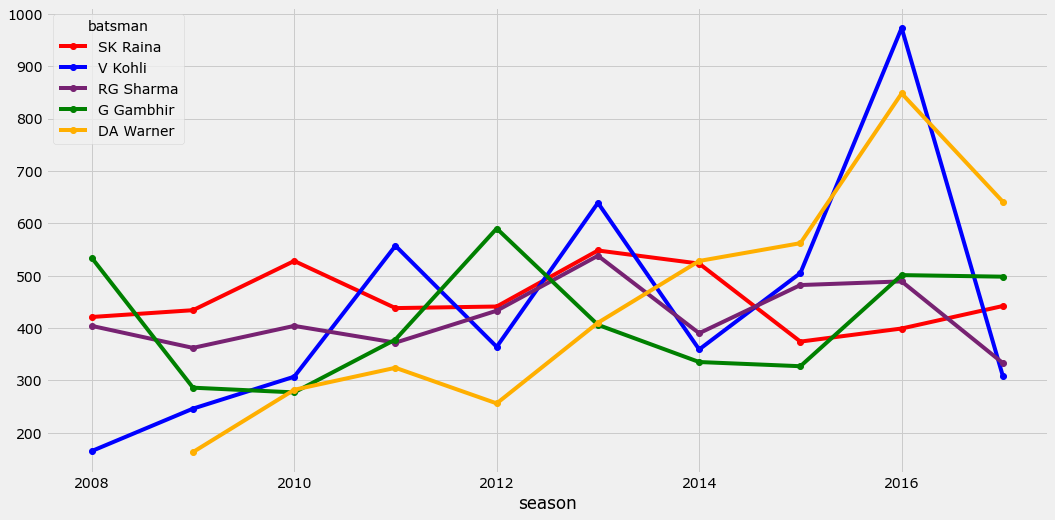

In [31]:
a=df.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
a=a.groupby(['season','batsman'])['batsman_runs'].sum().unstack().T
a['Total']=a.sum(axis=1)
a=a.sort_values(by='Total',ascending=0)[:5]
a.drop('Total',axis=1,inplace=True)
a.T.plot(color=['red','blue','#772272','green','#FFAF00'],marker='o', figsize = (16,8))
plt.show()

In [32]:
# runs and wickets per over #
                                                                                       
df['player_dismissed'][df['player_dismissed'] != "Not Applicable"] = 1
df['player_dismissed'][df['player_dismissed'] == "Not Applicable"] = 0
df['player_dismissed'] = df['player_dismissed'].astype('int64')
train_df = df.groupby(['match_id', 'inning', 'over', 'team1', 'team2', 'batting_team', 'winner'])[['total_runs', 'player_dismissed']].agg(['sum']).reset_index()
train_df.columns = train_df.columns.get_level_values(0)

# innings score and wickets #
train_df['innings_wickets'] = train_df.groupby(['match_id', 'inning'])['player_dismissed'].apply(lambda x: x.cumsum())
train_df['innings_score'] = train_df.groupby(['match_id', 'inning'])['total_runs'].apply(lambda x: x.cumsum())
train_df.head()

# Get the target column #
temp_df = train_df.groupby(['match_id', 'inning'])['total_runs'].sum().reset_index()
temp_df = temp_df[temp_df['inning']==1]
temp_df['inning'] = 2
temp_df.columns = ['match_id', 'inning', 'score_target']
train_df = train_df.merge(temp_df, how='left', on = ['match_id', 'inning'])
train_df['score_target'].fillna(-1, inplace=True)

# get the remaining target #
def get_remaining_target(row):
    if row['score_target'] == -1.:
        return -1
    else:
        return row['score_target'] - row['innings_score']

train_df['remaining_target'] = train_df.apply(lambda row: get_remaining_target(row),axis=1)

# get the run rate #
train_df['run_rate'] = train_df['innings_score'] / train_df['over']

# get the remaining run rate #
def get_required_rr(row):
    if row['remaining_target'] == -1:
        return -1.
    elif row['over'] == 20:
        return 99
    else:
        return row['remaining_target'] / (20-row['over'])
    
train_df['required_run_rate'] = train_df.apply(lambda row: get_required_rr(row), axis=1)

def get_rr_diff(row):
    if row['inning'] == 1:
        return -1
    else:
        return row['run_rate'] - row['required_run_rate']
    
train_df['runrate_diff'] = train_df.apply(lambda row: get_rr_diff(row), axis=1)
train_df['is_batting_team'] = (train_df['team1'] == train_df['batting_team']).astype('int')
train_df['target'] = (train_df['team1'] == train_df['winner']).astype('int')

train_df.head()

,match_id,inning,over,team1,team2,batting_team,winner,total_runs,player_dismissed,innings_wickets,innings_score,score_target,remaining_target,run_rate,required_run_rate,runrate_diff,is_batting_team,target
0,1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,7,0,0,7,-1.0,-1.0,7.000000,-1.0,-1.0,1,1
1,1,1,2,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,16,1,1,23,-1.0,-1.0,11.500000,-1.0,-1.0,1,1
2,1,1,3,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,6,0,1,29,-1.0,-1.0,9.666667,-1.0,-1.0,1,1
3,1,1,4,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,4,0,1,33,-1.0,-1.0,8.250000,-1.0,-1.0,1,1
4,1,1,5,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,9,0,1,42,-1.0,-1.0,8.400000,-1.0,-1.0,1,1


In [33]:
x_cols = ['inning', 'over', 'total_runs', 'player_dismissed', 'innings_wickets', 'innings_score', 'score_target', 'remaining_target', 'run_rate', 'required_run_rate', 'runrate_diff', 'is_batting_team']

# let us take all the matches but for the final as development sample and final as val sample #

dev_df = train_df[train_df.match_id < 536]
val_df = train_df[train_df.match_id >= 536]

# create the input and target variables #
dev_X = np.array(dev_df[x_cols[:]])
dev_y = np.array(dev_df['target'])
val_X = np.array(val_df[x_cols[:]])[:-1,:]
val_y = np.array(val_df['target'])[:-1]

print(dev_X.shape, dev_y.shape)
print(val_X.shape, val_y.shape)

(20605, 12) (20605,)
(3782, 12) (3782,)


In [34]:
import xgboost as xgb


# define the function to create the model #
def runXGB(train_X, train_y, seed_val=0):
    param = {}
    param['objective'] = 'binary:logistic'
    param['eta'] = 0.05
    param['max_depth'] = 8
    param['silent'] = 1
    param['eval_metric'] = "auc"
    param['min_child_weight'] = 1
    param['subsample'] = 0.7
    param['colsample_bytree'] = 0.7
    param['seed'] = seed_val
    num_rounds = 100

    plst = list(param.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)
    model = xgb.train(plst, xgtrain, num_rounds)
    return model

In [35]:
# let us build the model and get predcition for the final match #
model = runXGB(dev_X, dev_y)
xgtest = xgb.DMatrix(val_X)
preds = model.predict(xgtest)

[20:57:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




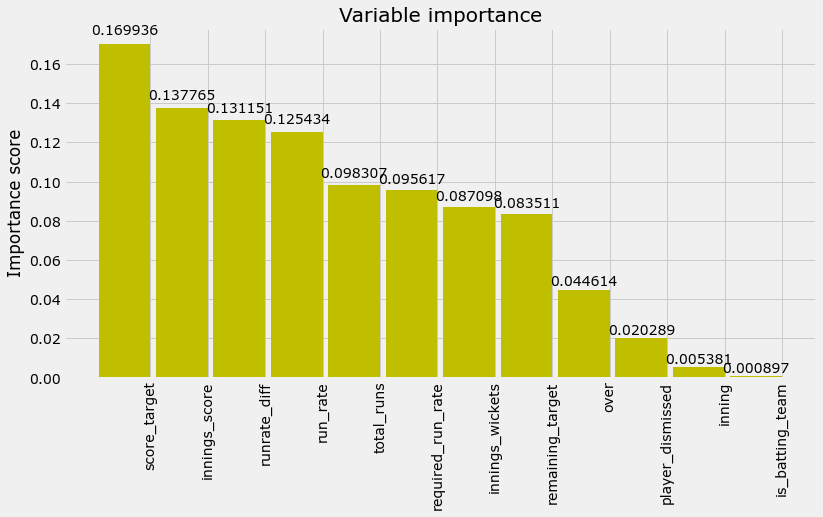

In [36]:
def create_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    for i, feat in enumerate(features):
        outfile.write('{0}\t{1}\tq\n'.format(i,feat))
    outfile.close()

create_feature_map(x_cols)
importance = model.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1), reverse=True)
imp_df = pd.DataFrame(importance, columns=['feature','fscore'])
imp_df['fscore'] = imp_df['fscore'] / imp_df['fscore'].sum()

# create a function for labeling #
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%f' % float(height),
                ha='center', va='bottom')
        
labels = np.array(imp_df.feature.values)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,6))
rects = ax.bar(ind, np.array(imp_df.fscore.values), width=width, color='y')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Importance score")
ax.set_title("Variable importance")
autolabel(rects)
plt.show()

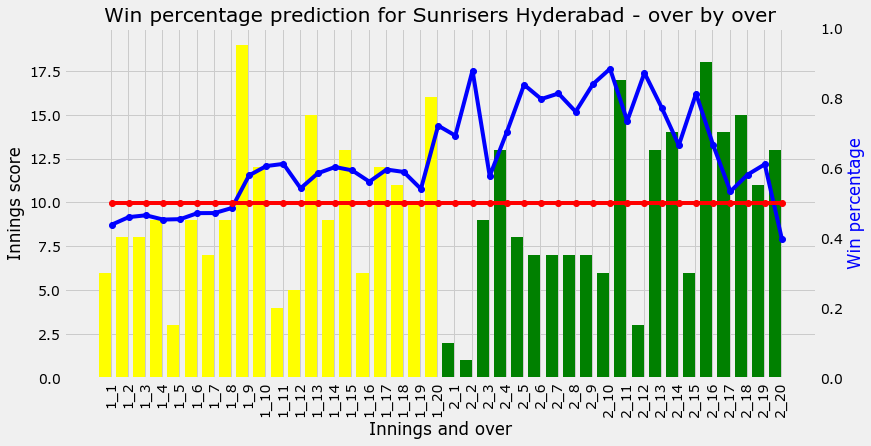

In [37]:
out_df = pd.DataFrame({'Team1':val_df.team1.values})
out_df['is_batting_team'] = val_df.is_batting_team.values
out_df['innings_over'] = np.array(val_df.apply(lambda row: str(row['inning']) + "_" + str(row['over']), axis=1))
out_df['innings_score'] = val_df.innings_score.values
out_df['innings_wickets'] = val_df.innings_wickets.values
out_df['score_target'] = val_df.score_target.values
out_df['total_runs'] = val_df.total_runs.values
out_df['predictions'] = list(preds)+[1]

fig, ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()
labels = np.array(out_df[:40]['innings_over'])
ind = np.arange(len(labels))
width = 0.7
rects = ax1.bar(ind, np.array(out_df[:40]['total_runs']), width=width, color=['yellow']*20 + ['green']*20)
ax1.set_xticks(ind+((width)/2.))
ax1.set_xticklabels(labels, rotation='vertical')
ax1.set_ylabel("Innings score")
ax1.set_xlabel("Innings and over")
ax1.set_title("Win percentage prediction for Sunrisers Hyderabad - over by over")

ax2.plot(ind+0.40, np.array(out_df[:40]['predictions']), color='b', marker='o')
ax2.plot(ind+0.40, np.array([0.5]*40), color='red', marker='o')
ax2.set_ylabel("Win percentage", color='b')
ax2.set_ylim([0,1])
ax2.grid(b=False)
plt.show()

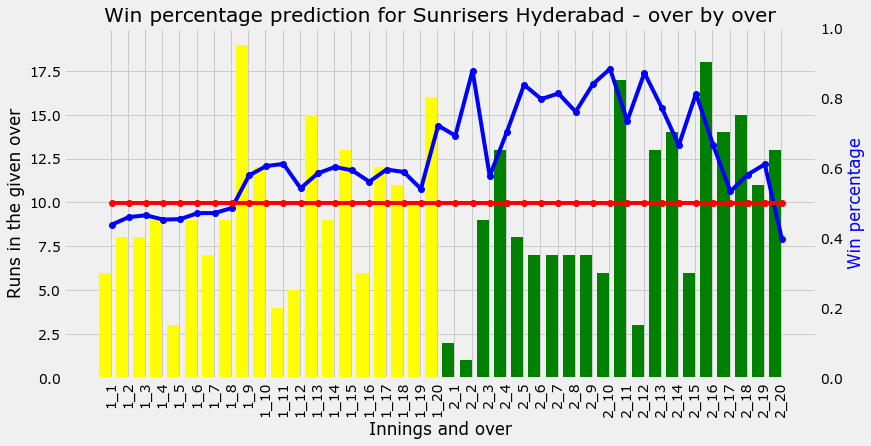

In [38]:
ig, ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()
labels = np.array(out_df[:40]['innings_over'])
ind = np.arange(len(labels))
width = 0.7
rects = ax1.bar(ind, np.array(out_df[:40]['total_runs']), width=width, color=['yellow']*20 + ['green']*20)
ax1.set_xticks(ind+((width)/2.))
ax1.set_xticklabels(labels, rotation='vertical')
ax1.set_ylabel("Runs in the given over")
ax1.set_xlabel("Innings and over")
ax1.set_title("Win percentage prediction for Sunrisers Hyderabad - over by over")

ax2.plot(ind+0.40, np.array(out_df[:40]['predictions']), color='b', marker='o')
ax2.plot(ind+0.40, np.array([0.5]*40), color='red', marker='o')
ax2.set_ylabel("Win percentage", color='b')
ax2.set_ylim([0,1])
ax2.grid(b=False)
plt.show()

In [39]:
import pickle as pkl

filename = 'eda_ipl_data.h5'
pkl.dump(model, open(filename, 'wb'))